# 02. 공간 데이터 분석

<br>

## 02.01. 축척과 거리
- **축척의 의미 : 지도상의 거리와 실제 거리의 비율**
    - 지도 "A"의 1cm 거리가 실제 세계의 100m를 나타내는 경우, 지도 축척은 1/10,000(1:10,000 또는 10-4)
    - 지도 "B"의 1cm가 실제 세계의 10km를 나타낸다면, 해당 지도의 축척은 1/1,000,000
    
    $\rightarrow$ **"A"는 두 번째 맵 "B"에 비해 상대적으로 큰 축척(및 높은 해상도)을 가짐**
    
    $\rightarrow$ **"A"와 "B"가 동일한 크기의 지도라면, "B"는 훨씬 더 넓은 영역을 나타냄 ("공간 범위"가 훨씬 더 커짐)**

<br>

- **`Raster` 데이터의 경우 해상도의 개념은 '셀의 크기'**
- **벡터 데이터의 경우 해상도는 잘 정의되지 않으며, 데이터 세트 내에서 크게 달라질 수 있지만, 선이나 다각형의 노드 (좌표 쌍) 사이의 평균 거리**
- **점 데이터에는 서로 특정 거리 내에 있는 단일 포인트로 병합되지 않는 한 해상도가 없음**

<br>

#### 지리 데이터에서, 데이터의 해상도와, 지리의 해상도 (축척)의 해상도가 일치하는 것이 바람직
- 예) 토양 특성 데이터의 지리축척이 100 $\times$ 100 = 10,000 km$^2$)이라면,
    
    **축척은 더 낮추어 계산을 할 수 있지만, 더 낮은 축척 구역에서의 토양 특성값은 확인할 수 없음**
    
    <br>

     $\rightarrow$ **더 넓은 프로세스에서 작동하는 프로세스 (숲)은 더 큰 축척 (나무)를 연구할 수 있는 반면,**
     
     **더 작은 범위서 작동하는 프로세스 (나무)는, 낮은 축척 (숲)이 아닌 더 큰 축척 (나뭇잎)을 연구하는 것이 마땅**

<br>

- 실용적인 관점에서 보면 축척과 해상도는 길이와 크기 추정에 영향을 미침
    - 예) 영국의 해안선 길이를 알고 싶다면 해당 해안선을 나타내는 공간 데이터세트의 길이를 사용
    
        공간 데이터의 축척이 높을수록 해안선이 길어 보임
        
<br>

-  **데이터를 더 낮은 축척으로 집계 할 수 있지만, 더 높은 축척으로 올바르게 분할 (“축소”) 하는 것은 거의 쉽지 않음**

<br>

### 구역화 (zonation)

<br>

#### 구역화 되지 않은 데이터

In [62]:
library(tidyverse)

In [1]:
set.seed(0)
xy <- cbind(x=runif(1000, 0, 100), y=runif(1000, 0, 100))
income <- (runif(1000) * abs((xy[,1] - 50) * (xy[,2] - 50))) / 500

- 데이터의 명확한 패턴이 존재함을 확인

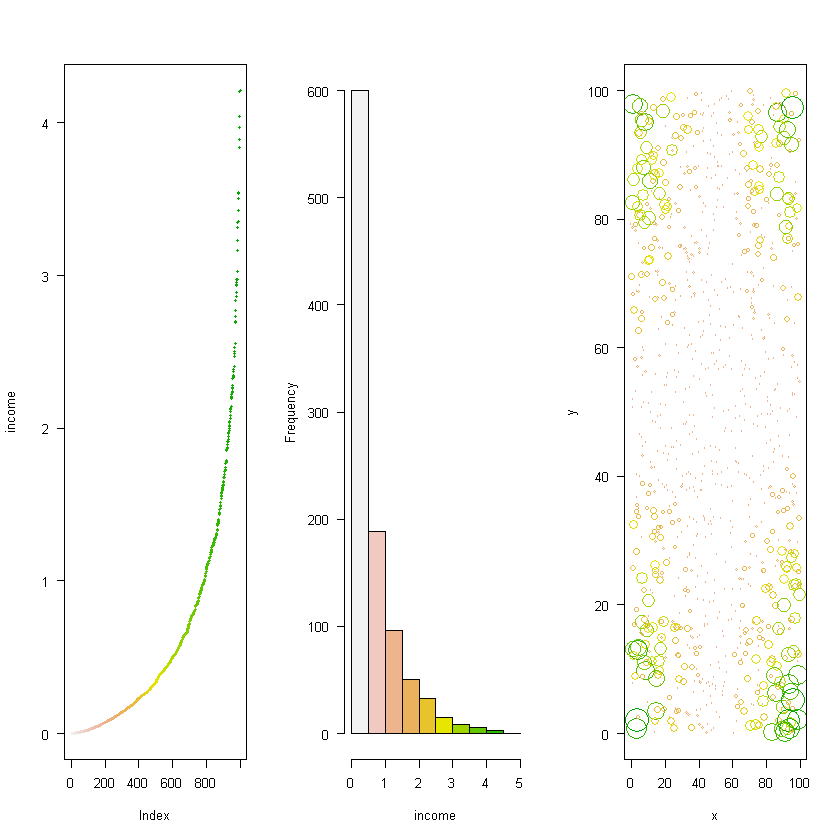

In [4]:
par(mfrow=c(1,3), las=1)
plot(sort(income), col=rev(terrain.colors(1000)), pch=20, cex=.75, ylab='income')
hist(income, main='', col=rev(terrain.colors(10)),  xlim=c(0,5), breaks=seq(0,5,0.5))
plot(xy, xlim=c(0,100), ylim=c(0,100), cex=income, col=rev(terrain.colors(50))[10*(income+1)])

In [5]:
n <- length(income)
G <- (2 * sum(sort(income) * 1:n)/sum(income) - (n + 1)) / n
G

[1] 0.5814548

<br>

#### 구역화된 데이터

In [7]:
library(terra)

In [8]:
v <- vect(xy)
v$income <- income

In [10]:
v

 class       : SpatVector 
 geometry    : points 
 dimensions  : 1000, 1  (geometries, attributes)
 extent      : 0.1314657, 99.99306, 0.06052661, 99.88775  (xmin, xmax, ymin, ymax)
 coord. ref. :  
 names       : income
 type        :  <num>
 values      : 0.7201
                0.126
               0.4573

- 구역을 더욱더 상세하게 지정할 수록, 패턴이 선명해짐

In [11]:
r1 <- rast(ncol=1, nrow=4, xmin=0, xmax=100, ymin=0, ymax=100)
r1 <- rasterize(v, r1, "income", mean)
r2 <- rast(ncol=4, nrow=1, xmin=0, xmax=100, ymin=0, ymax=100)
r2 <- rasterize(v, r2, "income", mean)
r3 <- rast(ncol=2, nrow=2, xmin=0, xmax=100, ymin=0, ymax=100)
r3 <- rasterize(v, r3, "income", mean)
r4 <- rast(ncol=3, nrow=3, xmin=0, xmax=100, ymin=0, ymax=100)
r4 <- rasterize(v, r4, "income", mean)
r5 <- rast(ncol=5, nrow=5, xmin=0, xmax=100, ymin=0, ymax=100)
r5 <- rasterize(v, r5, "income", mean)
r6 <- rast(ncol=10, nrow=10, xmin=0, xmax=100, ymin=0, ymax=100)
r6 <- rasterize(v, r6, "income", mean)

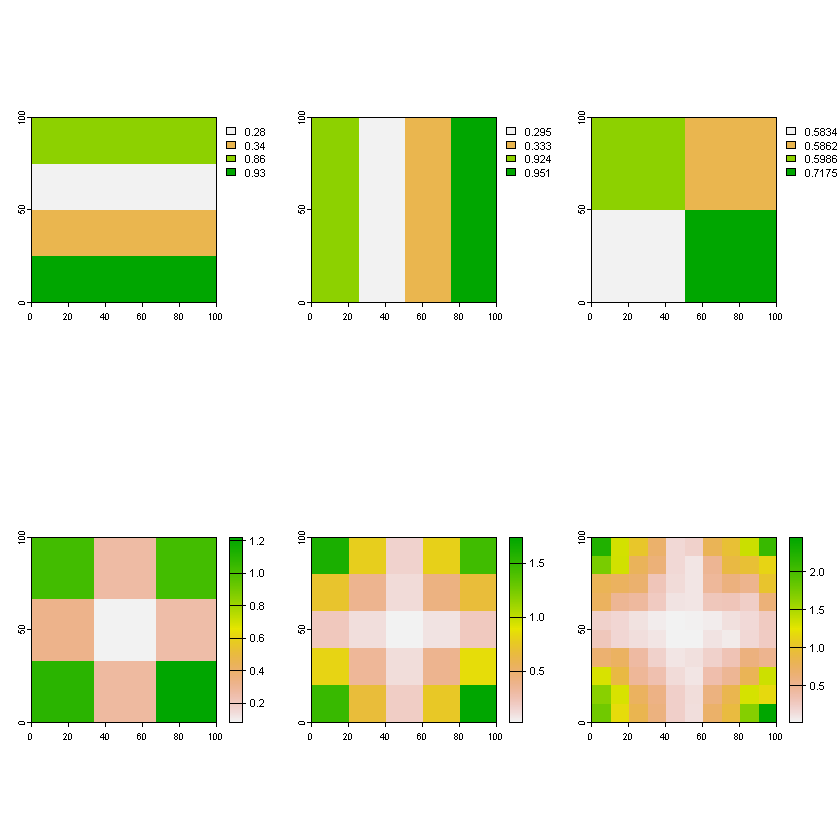

In [12]:
par(mfrow=c(2,3), las=1)
plot(r1); plot(r2); plot(r3); plot(r4); plot(r5); plot(r6)

<br>

### 거리
- 거리는 사물이 얼마나 멀리 떨어져 있는지를 숫자로 표현한 지리학의 가장 기본적인 개념
- Waldo Tobler의 지리학 제1법칙 : "모든 것은 다른 모든 것과 관련되어 있지만 가까운 것들은 먼 것보다 더 관련이 있다"
- 지리학에서는 국경, 산, 기타 장벽도 고려해야 하며, A와 B 사이의 거리는 심지어 비대칭적일 수도 있음
    
    **즉, A에서 B까지의 거리는 B에서 A까지의 거리와 동일하지 않음**

<br>

#### 거리 행렬
- 거리 행렬에는 관심 있는 모든 객체 사이의 거리에 대한 숫자를 가진 행렬.  
    
    (거리 행렬이 대칭이면 행렬의 절반만 필요)

In [15]:
A <- c(40, 43)
B <- c(101, 1)
C <- c(111, 54)
D <- c(104, 65)
E <- c(60, 22)
F <- c(20, 2)

A,40,43
B,101,1
C,111,54
D,104,65
E,60,22
F,20,2


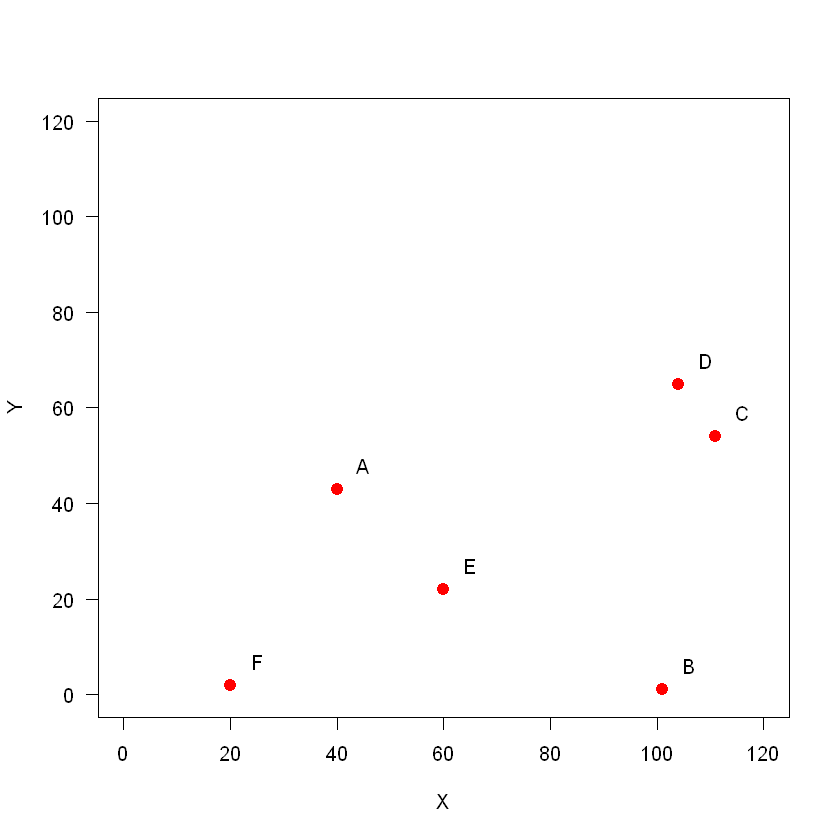

In [16]:
pts <- rbind(A, B, C, D, E, F)
pts

plot(pts, xlim=c(0,120), ylim=c(0,120), pch=20, cex=2, col='red', xlab='X', ylab='Y', las=1)
text(pts+5, LETTERS[1:6])

<br>

- 각 점간의 유클리디안 거리행렬

In [22]:
(dis <- dist(pts))

#### 일반 행렬로 변환
# D <- as.matrix(dis)
# round(D)

          A         B         C         D         E
B  74.06079                                        
C  71.84706  53.93515                              
D  67.67570  64.07027  13.03840                    
E  29.00000  46.06517  60.20797  61.52235          
F  45.61798  81.00617 104.80935 105.00000  44.72136

- 유클리디안 거리

In [19]:
sqrt((40-101)^2 + (43-1)^2)

[1] 74.06079

<br>

#### 좌표간 거리

#### `raster::pointDistance(lonlat)`
- **`lonlat` : `TRUE`일 시, 좌표간 거리 (미터) / `FALSE`일 시 유클리디안 거리**

In [26]:
gdis <- distance(pts, lonlat=T)
gdis

        1       2       3       4       5
2 7614198                                
3 5155577 5946748                        
4 4581656 7104895 1286094                
5 2976166 5011592 5536367 5737063        
6 4957298 9013726 9894640 9521864 4859627

<br>

### 공간적 영향
- 공간 통계 및 모델링의 중요한 단계는 지리적 개체 간의 공간적 영향을 측정하는 것
- 이는 인접성 또는 (역) 거리의 함수로 표현될 수 있으며, 종종 공간 가중치 행렬로 표현
- 영향력은 매우 복잡하여 실제로 측정할 수 없으며 여러 가지 방법으로 추정
    - 예) 일련의 국가 사이의 영향은 국경을 공유하는지, 인접한지의 여부로 표현

<br>

#### 인접 (adjacency)
- 이는 포인트 데이터를 분석할 때 가장 일반적인 접근 방식

<br>

- 인접 행렬을 생성
    - 점들이 서로 50 거리 내에 있는 경우 점을 "인접"으로 정의

In [31]:
a <-  D < 50
diag(a) <- NA
(Adj50 <- a * 1)

,A,B,C,D,E,F
A,NA,0,0,0,1,1
B,0,NA,0,0,1,0
C,0,0,NA,1,0,0
D,0,0,1,NA,0,0
E,1,1,0,0,NA,1
F,1,0,0,0,1,NA


<br>

#### N개의 최근접 이웃

- 각 점별 가장 가까운 2개의 점

In [35]:
cols <- apply(D, 1, order)
cols <- t(cols)
cols <- cols[, 2:3]
cols

A,5,6
B,5,3
C,4,2
D,3,5
E,1,6
F,5,1


In [37]:
rowcols <- cbind(rep(1:6, each=2), as.vector(t(cols)))
Ak3 <- Adj50 * 0
Ak3[rowcols] <- 1
Ak3

,A,B,C,D,E,F
A,NA,0,0,0,1,1
B,0,NA,1,0,1,0
C,0,1,NA,1,0,0
D,0,0,1,NA,1,0
E,1,0,0,0,NA,1
F,1,0,0,0,1,NA


<br>

#### 가중치 행렬
- 공간적 영향력을 번주형 혹은 이진형태로 표현하는 것이 아닌 연속형으로 표현
- 가장 간단한 접근 방식은 역 거리를 사용 (더 멀리 있을수록 값이 낮아짐)

In [39]:
W <- 1 / D
W[!is.finite(W)] <- NA
round(W, 4)

,A,B,C,D,E,F
A,NA,0.0135,0.0139,0.0148,0.0345,0.0219
B,0.0135,NA,0.0185,0.0156,0.0217,0.0123
C,0.0139,0.0185,NA,0.0767,0.0166,0.0095
D,0.0148,0.0156,0.0767,NA,0.0163,0.0095
E,0.0345,0.0217,0.0166,0.0163,NA,0.0224
F,0.0219,0.0123,0.0095,0.0095,0.0224,NA


- 행/열 별 합계

In [41]:
(rtot <- rowSums(W, na.rm=TRUE))

A          B          C          D          E          F 
0.09860117 0.08170418 0.13530597 0.13285878 0.11141516 0.07569154

In [42]:
colSums(W, na.rm=TRUE)

A          B          C          D          E          F 
0.09860117 0.08170418 0.13530597 0.13285878 0.11141516 0.07569154

<br>

### 다각형 (Polygon)에 대한 공간적 영향

In [43]:
p <- vect(system.file("ex/lux.shp", package="terra"))

- 루크 인접 행렬 생성
- 루크 인접성  
    - 공간 데이터셋에서 다각형 간의 인접 관계를 나타내는 방법 중 하나
    - **루크 인접성은 두 다각형이 변을 공유하는 경우에만 인접하다고 간주**
    
        **따라서 대각선 방향으로 위치한 다각형은 인접하지 않음** 
        
        (루크 인접성은 "룩(Look)"이라는 체스 말이 움직일 수 있는 방향과 동일한 원칙)
    
    <br>
    
    - **루크 인접성 원칙: 두 개의 다각형이 로크 인접해 있다는 것은 두 다각형이 변을 공유하고 있다는 것을 의미. 이웃한 다각형은 서로에게 인접한 변을 가지고 있어야 함**

    - **대각선 방향의 인접성 제외: 루크 인접성은 대각선 방향의 인접성을 고려하지 않음. 즉, 대각선에 위치한 다각형은 인접하지 않는 것으로 간주**

In [51]:
wr <- adjacent(p, "rook", pairs=FALSE)
dim(wr)
wr[1:6, 1:11]

[1] 12 12

,1,2,3,4,5,6,7,8,9,10,11
1,0,1,0,1,1,0,0,0,0,0,0
2,1,0,1,1,1,1,0,0,0,0,0
3,0,1,0,0,1,0,0,0,1,0,0
4,1,1,0,0,0,0,0,0,0,0,0
5,1,1,1,0,0,0,0,0,0,0,0
6,0,1,0,0,0,0,0,1,0,0,0


<br>

- 각 영역별 루크 인접 이웃 수

In [53]:
(i <- rowSums(wr))

1  2  3  4  5  6  7  8  9 10 11 12 
 3  6  4  2  3  3  3  4  4  3  5  6

<br>

- 다각형 관계 시각화

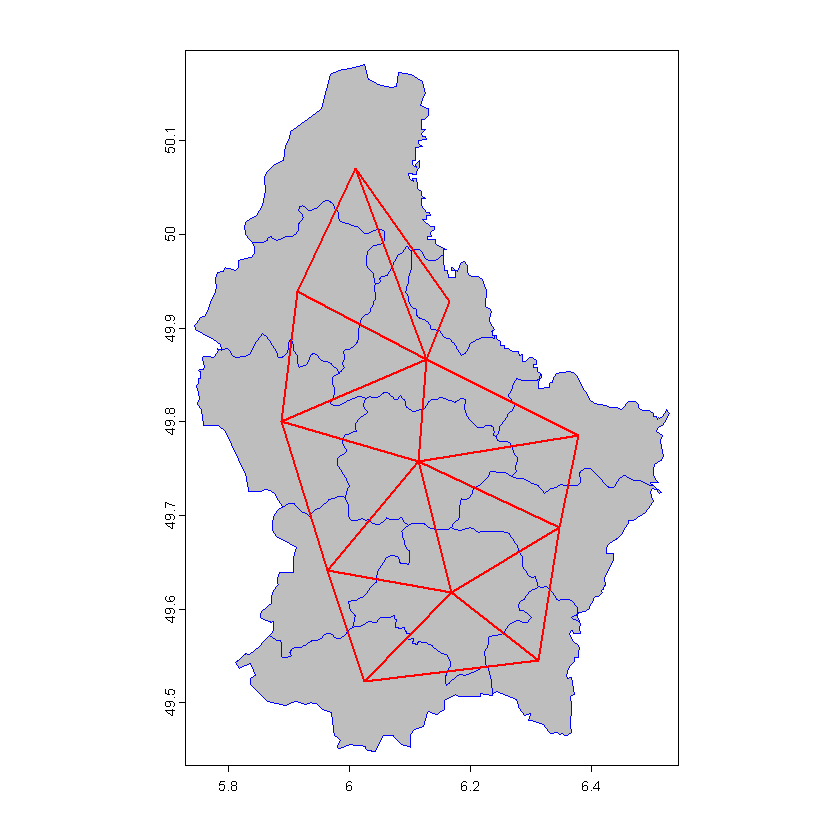

In [56]:
par(mai=c(0,0,0,0))
plot(p, col="gray", border="blue")
nb <- adjacent(p, "rook")
v <- centroids(p)
p1 <- v[nb[,1], ]
p2 <- v[nb[,2], ]
lines(p1, p2, col="red", lwd=2)

<br>

#### 거리 기반 영향력

- 각 다각형의 중심점

In [82]:
v <- centroids(p)
v

 class       : SpatVector 
 geometry    : points 
 dimensions  : 12, 6  (geometries, attributes)
 extent      : 5.886502, 6.378449, 49.52331, 50.07064  (xmin, xmax, ymin, ymax)
 coord. ref. : lon/lat WGS 84 (EPSG:4326) 
 names       :  ID_1   NAME_1  ID_2   NAME_2  AREA   POP
 type        : <num>    <chr> <num>    <chr> <num> <int>
 values      :     1 Diekirch     1 Clervaux   312 18081
                   1 Diekirch     2 Diekirch   218 32543
                   1 Diekirch     3  Redange   259 18664

- 각 중심별로 `distance` (km) 범위 이내 위치한, 다른 중심점

#### `nearby()`

In [83]:
wd10 <- nearby(v, distance=10000)
wd25 <- nearby(v, distance=25000)

<br>

#### N-최근접 이웃
#### `nearby()`

In [92]:
k3 <- nearby(v, k=3)
k6 <- nearby(v, k=6)

In [94]:
plotit <- function(nb, lab='') {
  plot(p, col='gray', border='white')
  v <- centroids(p)
  p1 <- v[nb[,1], ,drop=FALSE]
  p2 <- v[nb[,2], ,drop=FALSE]
  lines(p1, p2, col="red", lwd=2)
  text(6.3, 50.1, paste0('(', lab, ')'), cex=1.25)
}

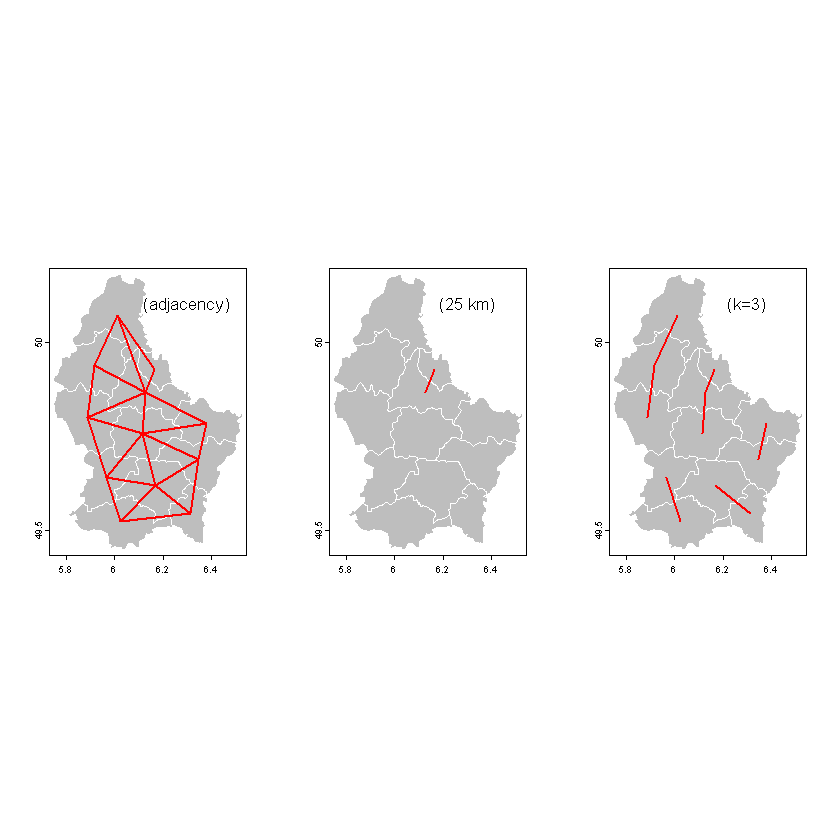

In [97]:
par(mfrow=c(1, 3), mai=c(0,0,0,0))
plotit(nb, "adjacency")
plotit(wd10, "25 km")
plotit(k3, "k=3")

<br>

## 02.02. 공간 자기상관
- 자기 상관(공간적이든 아니든)은 근처 관측치 간의 유사성(상관)을 측정한 것


<br>

### 시계열에서의 자기상관
- 시간이 지남에 따라 동일한 개체에 대한 무언가(예: 사람의 체중이나 재산)를 측정하는 경우, 시간상 서로 가까운 두 관측값도 측정 방식이 유사할 가능성이 높음

    몇 년 동안 체중이 50kg에서 80kg으로 늘어났다고 가정
    - 하루에 60kg, 다음 날에는 50kg, 그 다음 날에는 80kg이 될 가능성은 거의 없음.
    - 오히려 그것은 때때로 점점 가늘어지거나 심지어 방향이 반대되는 등 점진적으로 상승했을 것
    
- 시간 경과에 따른 연관성 정도를 측정하기 위해 각 관측치와 다음 관측치의 상관 관계를 계산할 수 있음

<br>

- 1시차 자기상관

In [109]:
set.seed(0)
(d <- sample(100, 10))

[1]  14  68  39   1  34  87  43 100  82  59

In [110]:
a <- d[-length(d)] %>% sort()
b <- d[-1] %>% sort()

In [111]:
cor(a, b)

[1] 0.9766666

- 여러 시차에 대한 자기상관

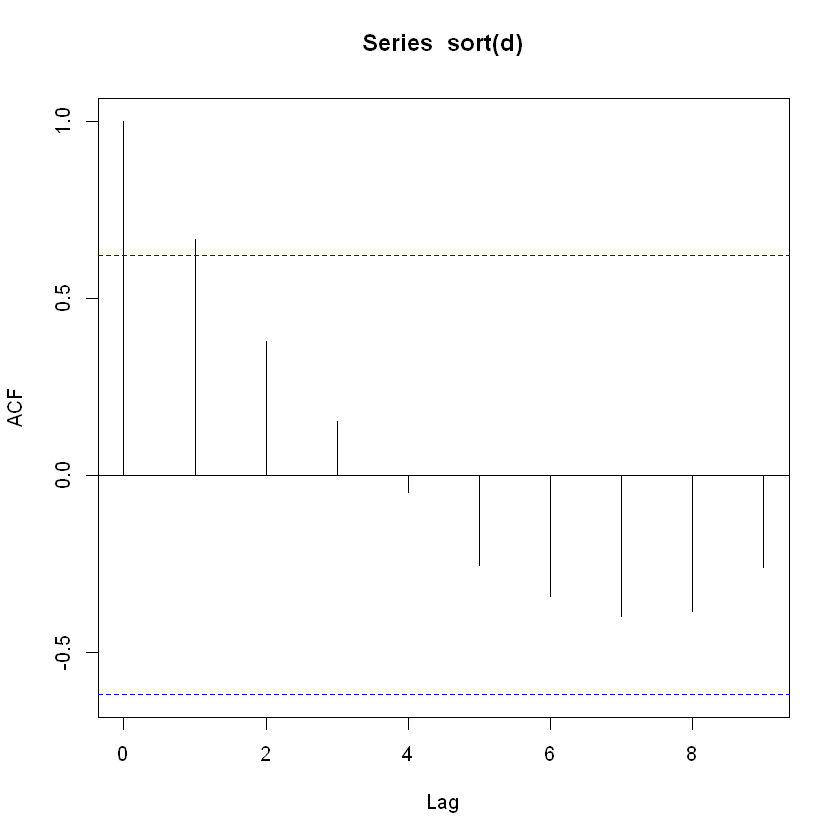

In [113]:
acf(sort(d))

<br>

### 공간 자기상관
- 시계열은 1차원 적인 단방향 데이터
- **공간 객체는 2차원 이상의 차원을 가지고 있으며, 무엇이 '가까운' 데이터인지 결정하는 것이 어려움**

<br>

- **공간 자기상관의 측정값은 공간 위치(점, 영역, `Raster` 셀 등)의 관측치(값)가 서로 유사한 정도를 설명**

    $\rightarrow$ **관찰값과 위치 라는 두가지가 필요**
    
<br>

- 공간 자기상관을 설명하는 데 일반적으로 사용되는 통계량은 Moran의 $I$ 통계량, Geary의 $C$ 통계량, 이진 데이터에 대한 Join-count 인덱스, '반 변이도' (semi-viogram) 등이 존재

<br>

#### 인접성 정의
- 어떤 다각형들이 '가깝게' 위치한지를 확인하고 수량화 하는 방법을 정의


In [129]:
p <- vect('ex/lux.shp')
p <- p[p$NAME_1 == "Diekirch", ]
p$value <- c(10, 6, 4, 11, 6)

In [133]:
values(p) %>% select(2:7)

NAME_1,ID_2,NAME_2,AREA,POP,value
<chr>,<dbl>,<chr>,<dbl>,<int>,<dbl>
Diekirch,1,Clervaux,312,18081,10
Diekirch,2,Diekirch,218,32543,6
Diekirch,3,Redange,259,18664,4
Diekirch,4,Vianden,76,5163,11
Diekirch,5,Wiltz,263,16735,6


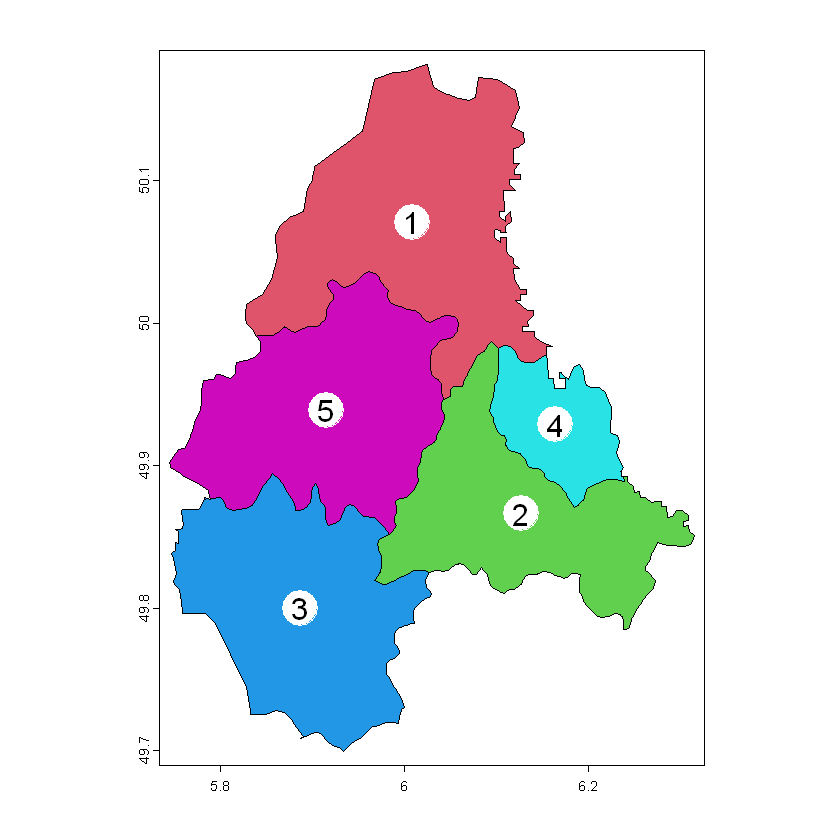

In [143]:
par(mai=c(0,0,0,0))
plot(p, col=2:7)
xy <- centroids(p)
points(xy, cex=6, pch=20, col='white')
text(p, 'ID_2', cex=1.5)

<br>

- **대칭적 공간 가중치 행렬 : 공간 데이터에서 공간적 상호 의존성을 표현**

In [145]:
(w <- adjacent(p, symmetrical = T))

from,to
1,2
1,4
1,5
2,3
2,4
2,5
3,5


- 다각형 (`AREA_2`) 사이의 링크 표현

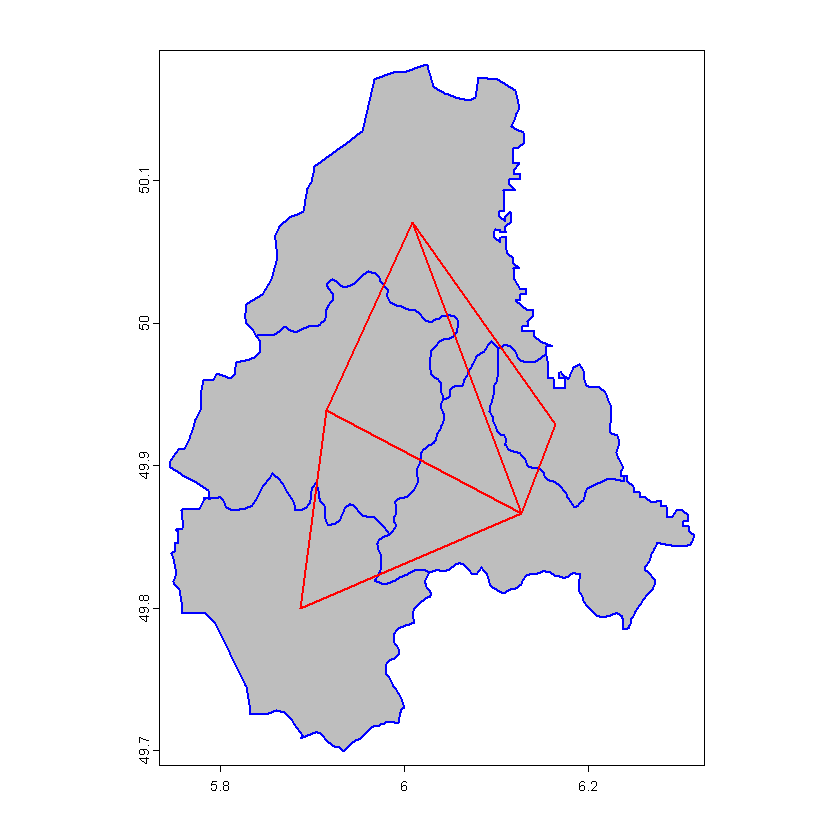

In [146]:
plot(p, col='gray', border='blue', lwd=2)
p1 <- xy[w[,1], ]
p2 <- xy[w[,2], ]
lines(p1, p2, col='red', lwd=2)

<br>

- **관측치 간의 지리적 관계의 강도를 반영하는 공간 가중치 행렬**

In [182]:
(wm <- adjacent(p, pairs = FALSE))

,1,2,3,4,5
1,0,1,0,1,1
2,1,0,1,1,1
3,0,1,0,0,1
4,1,1,0,0,0
5,1,1,1,0,0


<br>

### Moran의 $I$ 통계량 (공간 자기 상관 지수)

<br>

$$I = \frac{n}{\sum_{i=1}^n (y_i - \bar{y})^2} \frac{\sum_{i=1}^n \sum_{j=1}^n w_{ij}(y_i - \bar{y})(y_j - \bar{y})}{\sum_{i=1}^n \sum_{j=1}^n w_{ij}}$$

<br>

#### `autocor(method)`
- `method` = `'moran'` : Moran의 $I$ 통계량 / `'gary'` :  Geary의  $C$ 통계량

<br>

- 단순 인접 행렬 (공간 가중치 행렬) 생성

In [162]:
(ww <-  adjacent(p, "queen", pairs=FALSE))

,1,2,3,4,5
1,0,1,0,1,1
2,1,0,1,1,1
3,0,1,0,0,1
4,1,1,0,0,0
5,1,1,1,0,0


In [163]:
(ac <- autocor(p$value, ww, "moran"))

[1] 0.1728896

<br>

#### **몬테카를로 시뮬레이션을 통한 통계량 유의성 검정**
- 값이 다각형에 무작위로 할당되고, Moran의 $I$통계량이 계산되는 방식
- 기대값의 분포를 확립하기 위해 여러 번 반복
- $I$의 관측값을 시뮬레이션된 분포와 비교하여 관측값이 무작위 추첨으로 간주될 수 있는 가능성을 확인

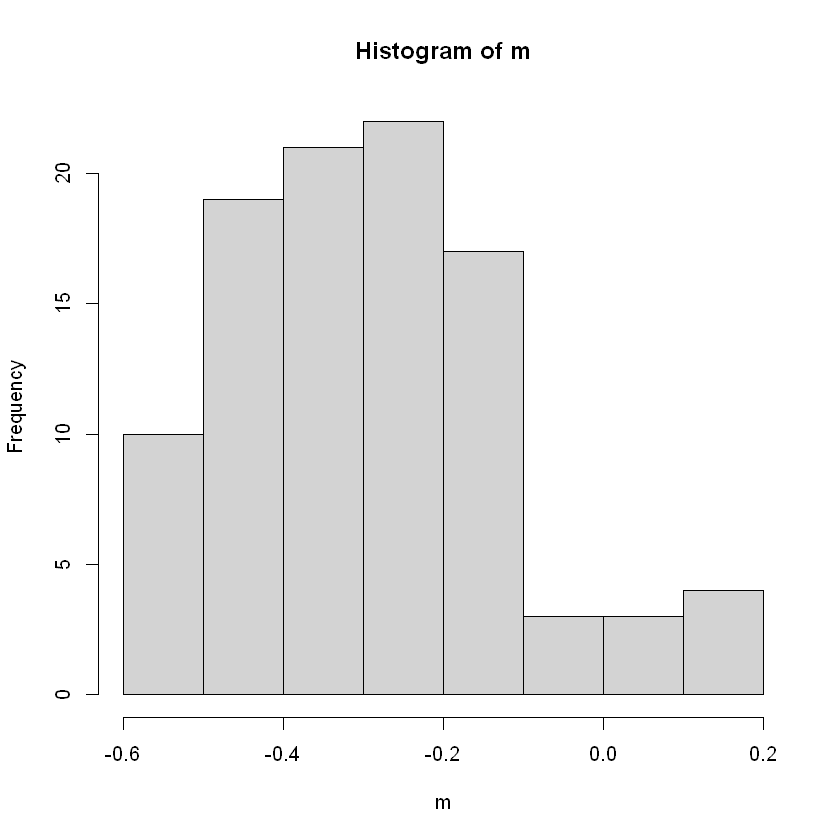

In [165]:
m <- sapply(1:99, function(i) {
    autocor(sample(p$value), ww, "moran")
})
hist(m)

- p-value < 0.05 $\rightarrow$ 귀무가설 기각 $\rightarrow$ Moran의 공간 자기상관성이 유의

In [170]:
library(spdep)

In [168]:
(pval <- sum(m >= ac) / 100)

[1] 0.03

<br>

#### 공간 자기상관성 시각화 (Moran 산점도)

In [197]:
n <- length(p)
y <- p$value
(wm <- adjacent(p, pairs = FALSE))

,1,2,3,4,5
1,0,1,0,1,1
2,1,0,1,1,1
3,0,1,0,0,1
4,1,1,0,0,0
5,1,1,1,0,0


In [198]:
ms <- cbind(id=rep(1:n, each=n), y=rep(y, each=n), value=as.vector(wm * y))
ms <- ms[ms[,3] > 0, ]

<br>

- 이웃 값의 평균

In [186]:
ams <- aggregate(ms[, 2:3], list(ms[, 1]), FUN = mean)
ams <- ams[, -1]
colnames(ams) <- c('y', 'spatially lagged y')
ams

y,spatially lagged y
<dbl>,<dbl>
10,7.666667
6,7.750000
4,6.000000
11,8.000000
6,6.666667


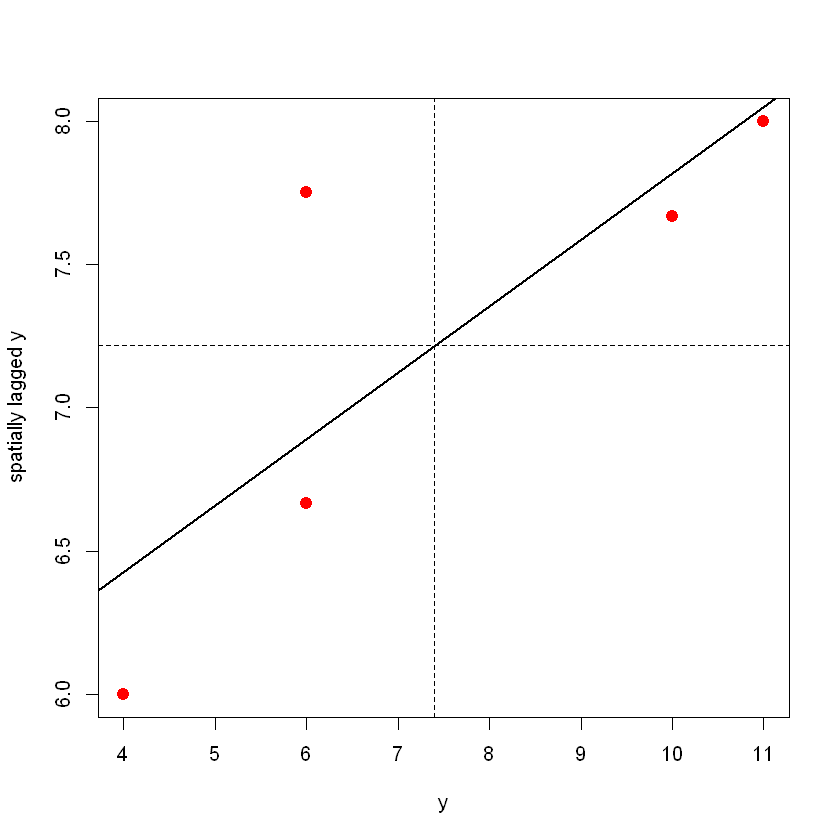

In [187]:
plot(ams, pch=20, col="red", cex=2)
reg <- lm(ams[,2] ~ ams[,1])
abline(reg, lwd=2)
abline(h=mean(ams[,2]), lt=2)
abline(v=ybar, lt=2)

<br>

- 회귀선의 기울기

In [191]:
library(tidymodels)

In [192]:
tidy(reg)

term,estimate,std.error,statistic,p.value
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),5.5033144,0.76359661,7.207096,0.005506554
"ams[, 1]",0.2315341,0.09713366,2.383665,0.097295510


<br>

## 02.03. 보간 (Interpolation)
- 거의 모든 지리적 변수에는 공간적 자기상관이 존재. 
    - 통계 검정에서는 문제가 될 수 있지만, 측정이 이루어지지 않은 위치의 값을 예측하려는 경우 매우 유용
    - 일반적으로 가까운 위치의 값이 유사할 것이라고 안전하게 가정할 수 있기 때문

<br>

### 캘리포니아 온도 데이터

In [203]:
library(rspat)

In [205]:
d <- spat_data('precipitation')
head(d)

,ID,NAME,LAT,LONG,ALT,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC
,<chr>,<chr>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,ID741,DEATH VALLEY,36.47,-116.87,-59,7.4,9.5,7.5,3.4,1.7,1.0,3.7,2.8,4.3,2.2,4.7,3.9
2,ID743,THERMAL/FAA AIRPORT,33.63,-116.17,-34,9.2,6.9,7.9,1.8,1.6,0.4,1.9,3.4,5.3,2.0,6.3,5.5
3,ID744,BRAWLEY 2SW,32.96,-115.55,-31,11.3,8.3,7.6,2.0,0.8,0.1,1.9,9.2,6.5,5.0,4.8,9.7
4,ID753,IMPERIAL/FAA AIRPORT,32.83,-115.57,-18,10.6,7.0,6.1,2.5,0.2,0.0,2.4,2.6,8.3,5.4,7.7,7.3
5,ID754,NILAND,33.28,-115.51,-18,9.0,8.0,9.0,3.0,0.0,1.0,8.0,9.0,7.0,8.0,7.0,9.0
6,ID758,EL CENTRO/NAF,32.82,-115.67,-13,9.8,1.6,3.7,3.0,0.4,0.0,3.0,10.8,0.2,0.0,3.3,1.4


<br>

#### 연간 강수량

In [207]:
mnts <- toupper(month.abb)
d$prec <- rowSums(d[, mnts])

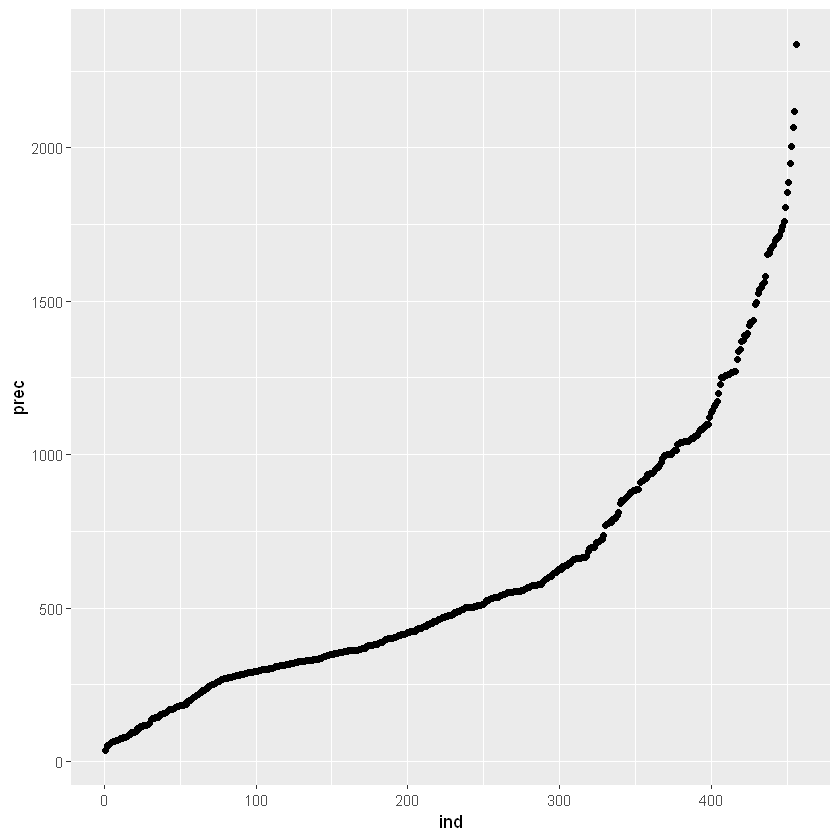

In [220]:
d %>% arrange(prec) %>%
    mutate(ind = row_number()) %>%
    ggplot() + geom_point(aes(ind, prec))

<br>

#### 지도 생성

In [221]:
dsp <- vect(d, c("LONG", "LAT"), crs="+proj=longlat +datum=NAD83")
CA <- spat_data('counties')

In [226]:
cuts <- c(0,200,300,500,1000,3000)

In [227]:
blues <- colorRampPalette(c('yellow', 'orange', 'blue', 'dark blue'))

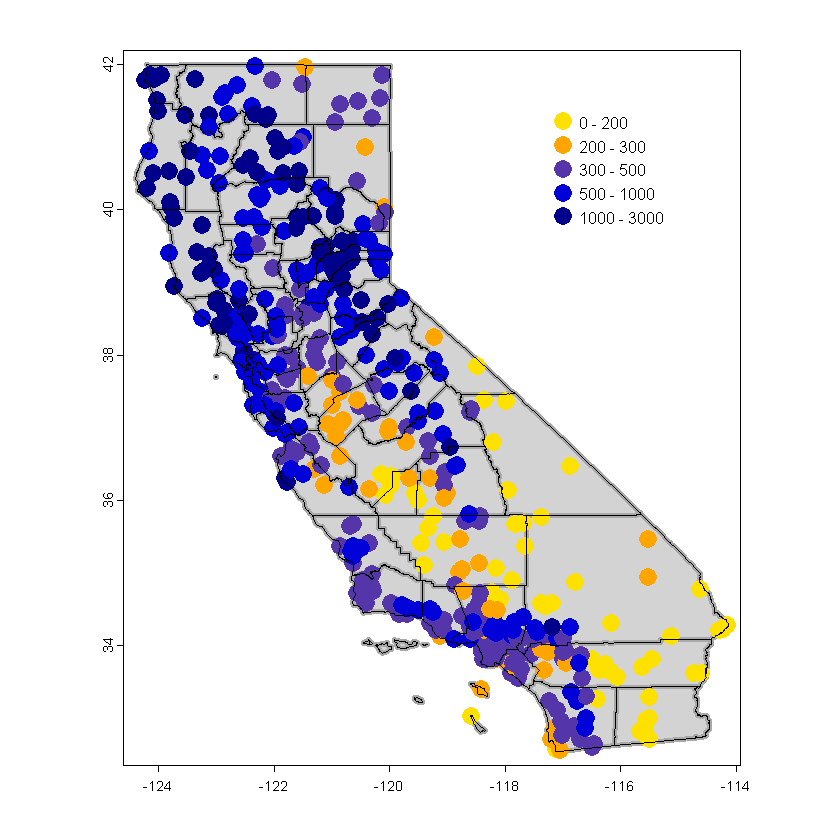

In [228]:
plot(CA, col="light gray", lwd=4, border="dark gray")
plot(dsp, "prec", type="interval", col=blues(10), legend=TRUE, cex=2,
    breaks=cuts, add=TRUE, plg=list(x=-117.27, y=41.54))
lines(CA)

<br>

- Teale Albers CRS 투영

In [229]:
TA <- "+proj=aea +lat_1=34 +lat_2=40.5 +lat_0=0 +lon_0=-120 +x_0=0 +y_0=-4000000 +datum=WGS84 +units=m"
dta <- project(dsp, TA) 
cata <- project(CA, TA) # 캘리포니아 지역 다각형

<br>

### 영모형 설정 (NULL 모델)
- **강수량 값을 보간(샘플링되지 않은 위치에 대한 추정치)**
    - 가장 간단한 방법은 모든 관찰의 평균을 취하는 것
    - 이를 다른 접근 방식과 비교할 수 있는 영모형으로 설정
- RMSE(Root Mean Square Error)를 평가 지표로 사용

In [237]:
RMSE <- function(observed, predicted) {
  sqrt(mean((predicted - observed)^2, na.rm=TRUE))
}

- 영모형에 대한 RMSE

In [238]:
(null <- RMSE(mean(dsp$prec), dsp$prec))

[1] 435.3217

<br>

### 근접 다각형 보간
- **근접 다각형을 사용하여, 범주형 변수를 보간 (최근접 이웃 보간)**

<br>

#### `voronoi()`

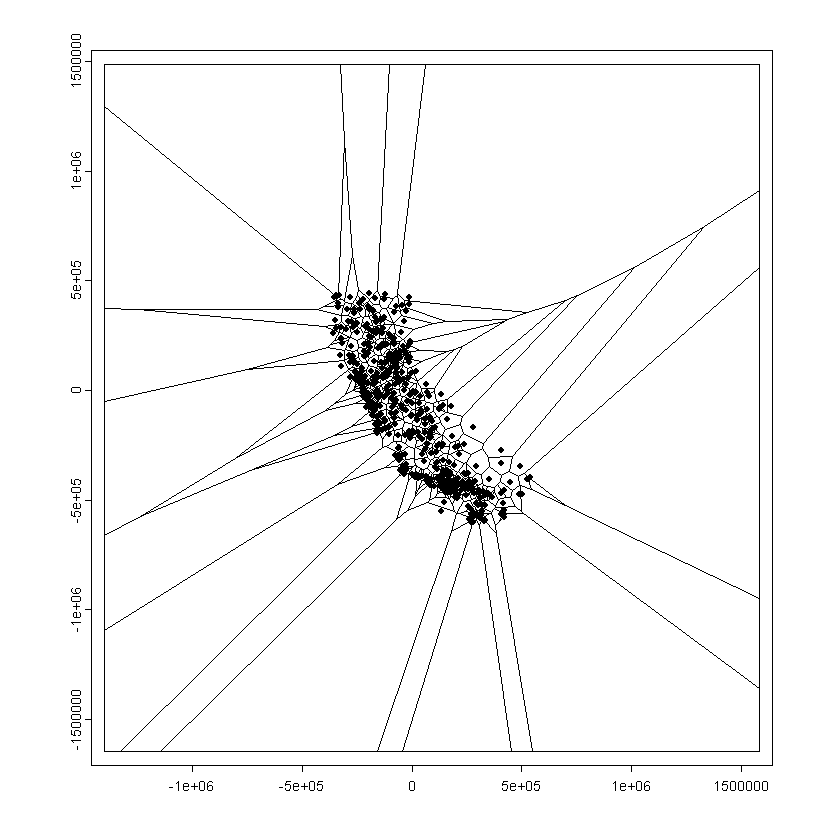

In [242]:
v <- voronoi(dta)
plot(v)
points(dta)

<br>

- 캘리포니아가 아닌 곳을 잘라내고, 강수량을 시각화

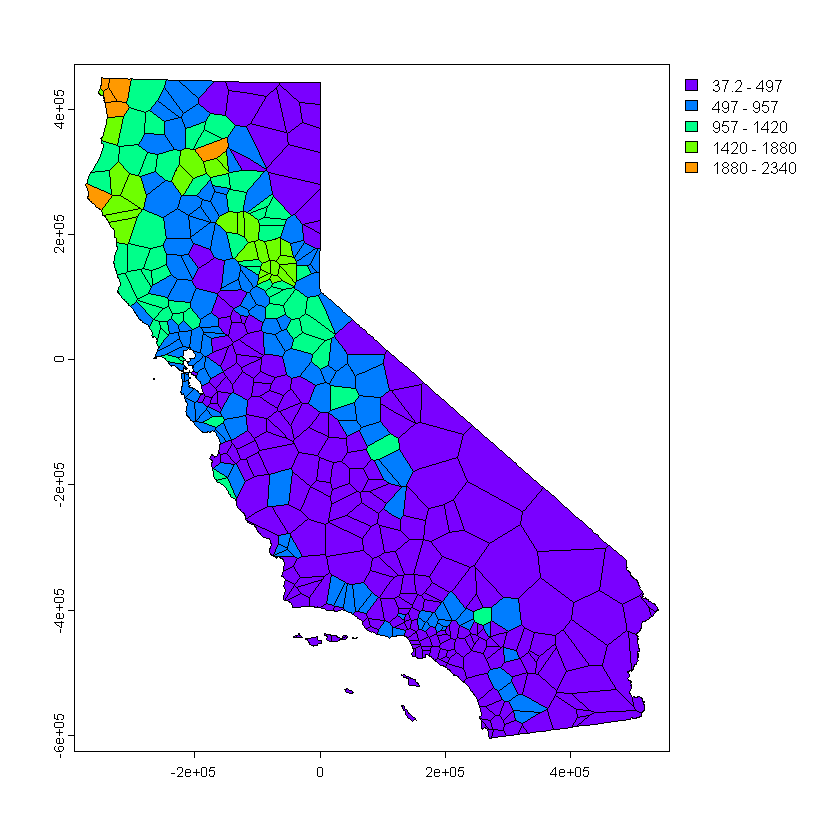

In [243]:
vca <- crop(v, cata)
plot(vca, "prec")

- `rasterize`

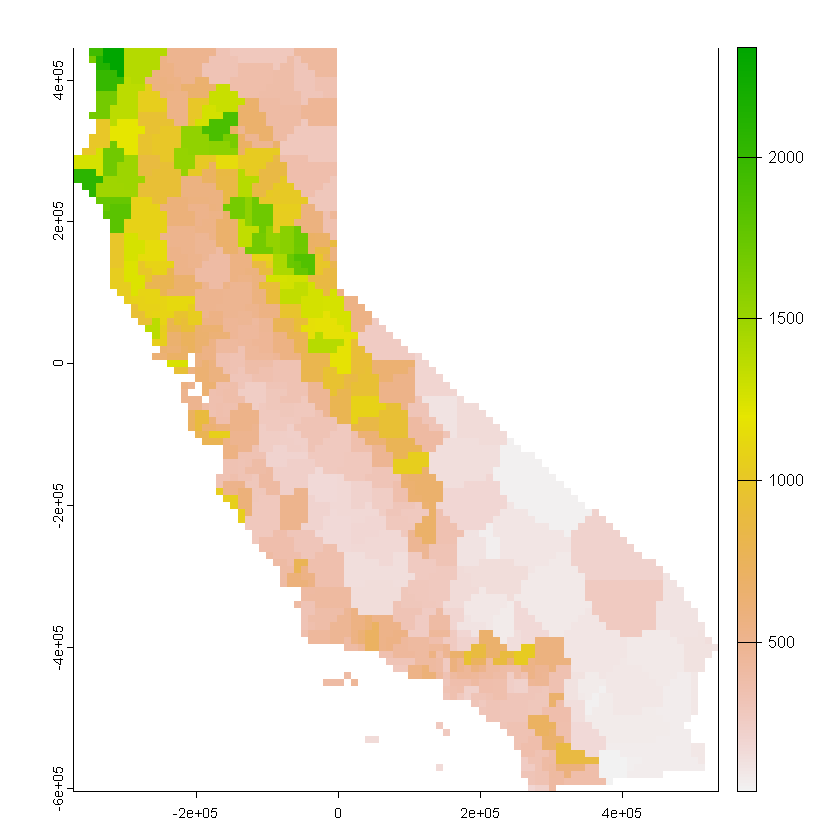

In [248]:
r <- rast(vca, res=10000)
vr <- rasterize(vca, r, "prec")
plot(vr)

<br>

- 5-folds CV

In [259]:
set.seed(5132015)
kf <- sample(1:5, nrow(dta), replace=TRUE)
rmse <- rep(NA, 5)

In [260]:
for (k in 1:5) {
  test <- dta[kf == k, ]
  train <- dta[kf != k, ]
  v <- voronoi(train)
  p <- terra::extract(v, test)
  rmse[k] <- RMSE(test$prec, p$prec)
}

In [263]:
rmse

[1] 192.0568 203.1304 183.5556 177.5523 205.6921

In [264]:
mean(rmse)

[1] 192.3974

In [265]:
perf <- 1 - (mean(rmse) / null)
round(perf, 3)

[1] 0.558

<br>

### 최근접 이웃 보간

In [266]:
library(gstat)

In [267]:
d <- data.frame(geom(dta)[,c("x", "y")], as.data.frame(dta))
head(d)

,x,y,ID,NAME,ALT,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,prec
,<dbl>,<dbl>,<chr>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,280058.6,-167265.4,ID741,DEATH VALLEY,-59,7.4,9.5,7.5,3.4,1.7,1.0,3.7,2.8,4.3,2.2,4.7,3.9,52.1
2,355394.7,-480020.3,ID743,THERMAL/FAA AIRPORT,-34,9.2,6.9,7.9,1.8,1.6,0.4,1.9,3.4,5.3,2.0,6.3,5.5,52.2
3,416370.9,-551681.2,ID744,BRAWLEY 2SW,-31,11.3,8.3,7.6,2.0,0.8,0.1,1.9,9.2,6.5,5.0,4.8,9.7,67.2
4,415173.4,-566152.9,ID753,IMPERIAL/FAA AIRPORT,-18,10.6,7.0,6.1,2.5,0.2,0.0,2.4,2.6,8.3,5.4,7.7,7.3,60.1
5,418432.1,-516087.7,ID754,NILAND,-18,9.0,8.0,9.0,3.0,0.0,1.0,8.0,9.0,7.0,8.0,7.0,9.0,78.0
6,405858.6,-567692.3,ID758,EL CENTRO/NAF,-13,9.8,1.6,3.7,3.0,0.4,0.0,3.0,10.8,0.2,0.0,3.3,1.4,37.2


<br>

<br>

#### `gstat(formula, locations, data, nmax, set)`
- **`nmax` : 사용 최근접 이웃 수**

<br>

- 좌표 (x, y)만을 사용하여 모형 적합, 5개의 최근접 이웃을 사용
- 거리 가중치 `idp`를 0으로 적용 $\rightarrow$ 5개의 최근접 이웃 모두에 동일한 가중치 적용

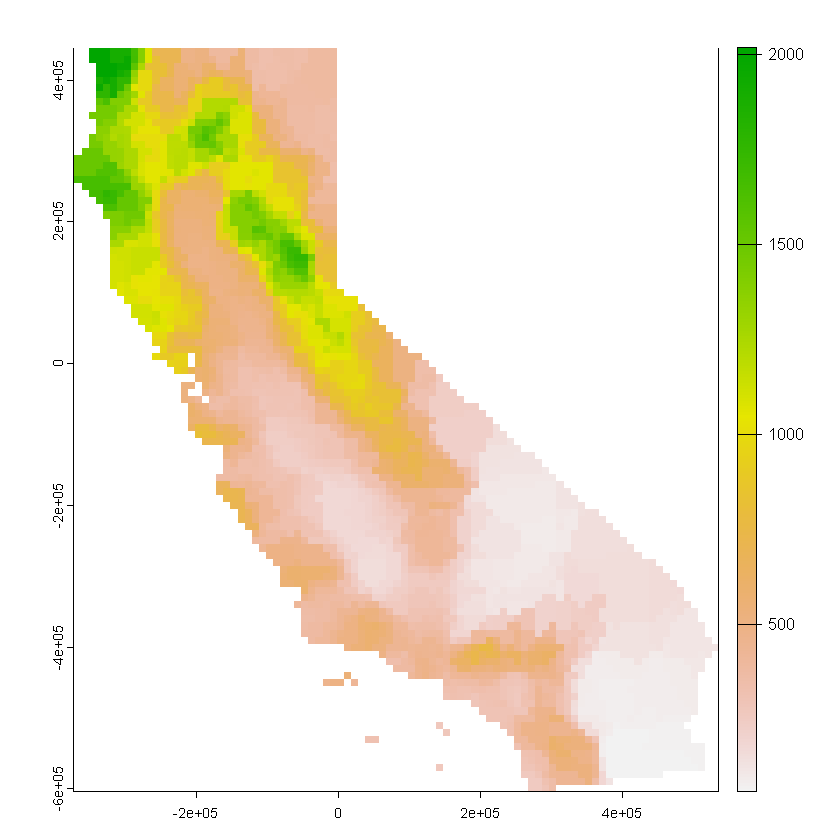

In [269]:
gs <- gstat(formula=prec~1, locations=~x+y, data=d, nmax=5, set=list(idp = 0))
nn <- interpolate(r, gs, debug.level=0)
nnmsk <- mask(nn, vr)
plot(nnmsk, 1)

- 5-folds CV

In [270]:
rmsenn <- rep(NA, 5)

for (k in 1:5) {
    test <- d[kf == k, ]
    train <- d[kf != k, ]
    gscv <- gstat(formula=prec~1, locations=~x+y, data=train, nmax=5, set=list(idp = 0))
    p <- predict(gscv, test, debug.level=0)$var1.pred
    rmsenn[k] <- RMSE(test$prec, p)
}

In [271]:
rmsenn

[1] 215.0993 209.5838 197.0604 177.1946 189.8130

In [273]:
mean(rmsenn)

[1] 197.7502

In [272]:
1 - (mean(rmsenn) / null)

[1] 0.5457377

<br>

### 거리 반비례 가중치 보간 (IDW, Inverse Distance Weight)
- 최근접 이웃 보간법과의 유일한 차이점은, **더 멀리 있는 포인트가 더 적은 가중치를 갖는다는 것**

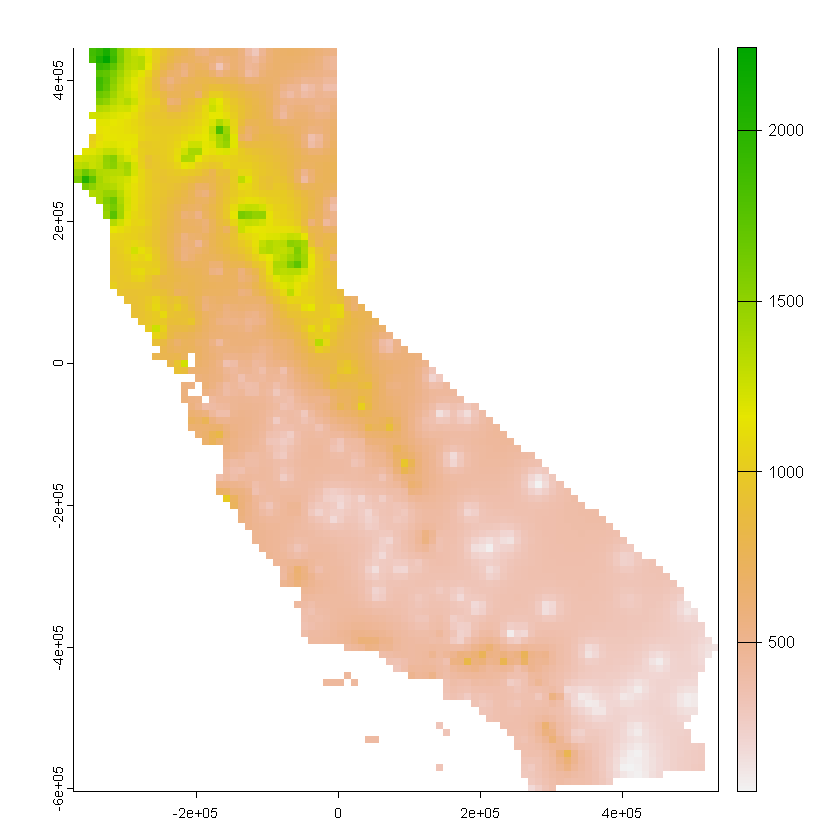

In [281]:
gs <- gstat(formula=prec~1, locations=~x+y, data=d)
idw <- interpolate(r, gs, debug.level=0)
idwr <- mask(idw, vr)
plot(idwr, 1)

- 5-folds CV

In [282]:
rmse <- rep(NA, 5)

for (k in 1:5) {
  test <- d[kf == k, ]
  train <- d[kf != k, ]
  gs <- gstat(formula=prec~1, locations=~x+y, data=train)
  p <- predict(gs, test, debug.level=0)
  rmse[k] <- RMSE(test$prec, p$var1.pred)
}

In [283]:
rmse

[1] 243.3256 212.6271 206.8982 180.1828 207.5790

In [284]:
mean(rmse)

[1] 210.1225

In [285]:
1 - (mean(rmse) / null)

[1] 0.5173166

<br>

### 크리깅 (Krigging, 지리통계학적 보간법)

<br>

#### 캘리포니아 대기 오염 데이터

In [286]:
x <- rspat::spat_data("airqual")
x$OZDLYAV <- x$OZDLYAV * 1000
x <- vect(x, c("LONGITUDE", "LATITUDE"), crs="+proj=longlat +datum=WGS84")

In [287]:
TAkm <- "+proj=aea +lat_1=34 +lat_2=40.5 +lat_0=0 +lon_0=-120 +x_0=0 +y_0=-4000000 +datum=WGS84 +units=km"
aq <- project(x, TAkm)

- `SpatRaster` 객체화

In [293]:
ca <- project(CA, TAkm)
r <- rast(ca)
res(r) <- 10  # CRS 단위가 km인 경우 10km

<br>

#### 변이도 (variogram) 설정
- **변이도 (Variogram) : 베리오그램은 두 지점 사이의 거리와 그 거리에서의 데이터 값의 변동성 사이의 관계를 표현하는 함수**
    - **일반적으로 거리가 늘어남에 따라 변동성도 증가한다고 가정하며, 공간의 '거리-유사성' 원칙에 기반**
    - **즉, 가까운 위치에 있는 데이터 포인트는 멀리 떨어진 데이터 포인트보다 더 유사할 것이라는 기대**
    - **상관성이 떨어질수록 산정되는 값이 증가**

<br>

- 산정 방법
    - 임의의 두 지점 (x, x+h)의 자료값의 차이 h를 제곱하여 모두 더한 후, 평균을 계산 
    
        h를 변화시켜 h에 대한 변이도 함수를 작성하고, 그 값을 그래프로 확인
                
        $2\gamma(h) = E[z(x) - z(x+h)^2) - \text{변이도 식}$
    
    <br>
    
    - 일반적으로 변이도를 1/2를 곱한 반-변이도(semi-variogram)을 많이 사용
    
        $\gamma(h) = \frac{1}{2n} \sum^n_{x=1}[z(x)-z(x+h)^2]-\text{반-변이도 식}$
<br>

$$h = \text{두 값의 거리 (lag)}$$
$$z = \text{해당 위치에서의 변수 값}$$
$$n = \text{h만큼 이격된 자료 쌍의 개수}$$

<br>

- 일련의 임곗값(threshold)에 해당하는 값이 처음으로 나타나는 지점까지의 거리를 상관 거리(correlation length)


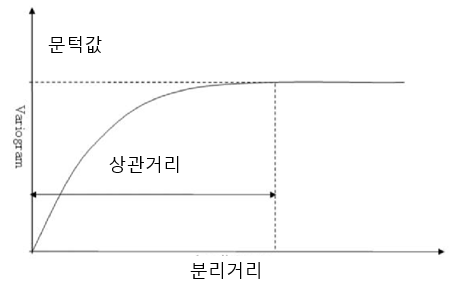

<br>

#### `variogram()`

- gstat를 사용하여 경험적 변이도 `v` 생성

In [344]:
p <- data.frame(geom(aq)[, c("x", "y")], as.data.frame(aq))
gs <- gstat(formula=OZDLYAV~1, locations=~x+y, data=p)
v <- variogram(gs, width=20)

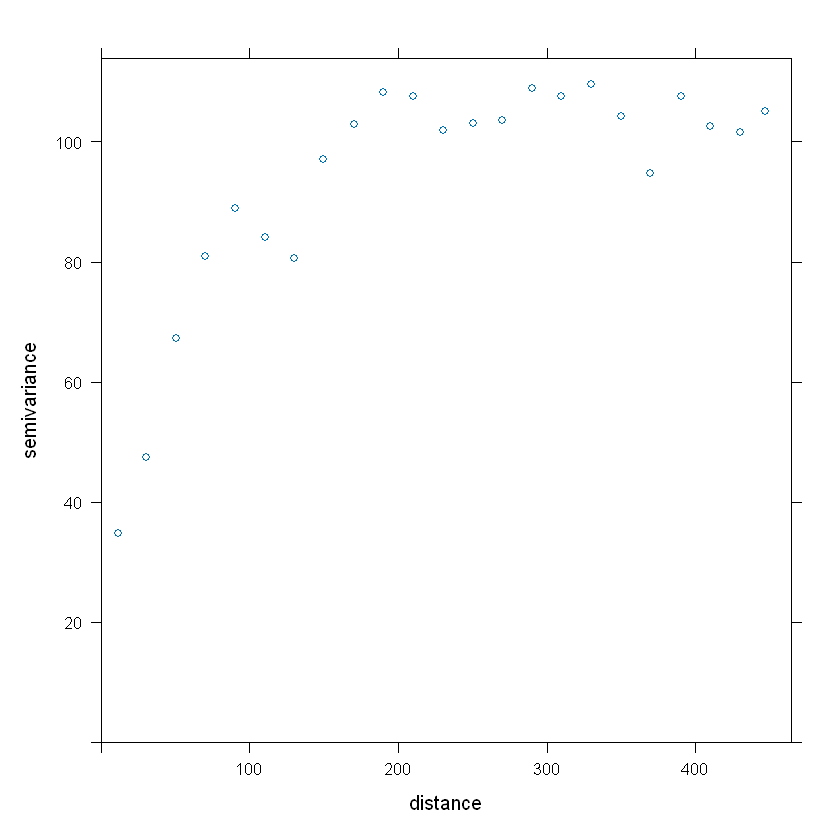

In [345]:
plot(v)

<br>

#### 변이도 적합

- 지수형 적합

In [326]:
??gstat::fit.variogram

In [324]:
?fig.variogram

In [316]:
fve <- fit.variogram(v, vgm(85, "Exp", 75, 20))

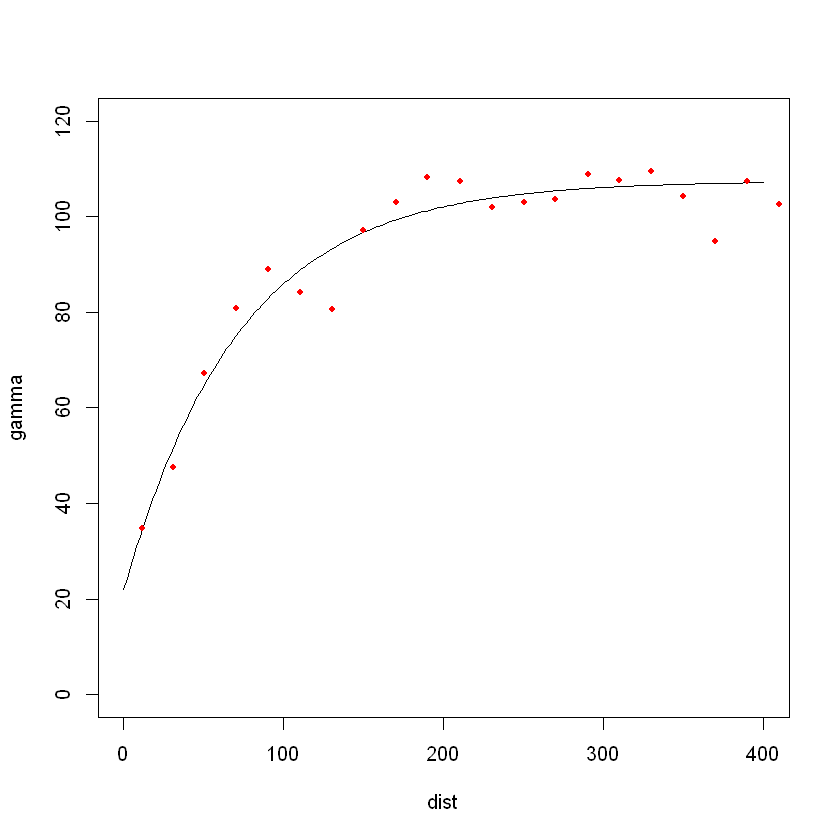

In [317]:
plot(variogramLine(fve, 400), type='l', ylim=c(0,120))
points(v[,2:3], pch=20, col='red')

- 구(Sphere) 형 적합

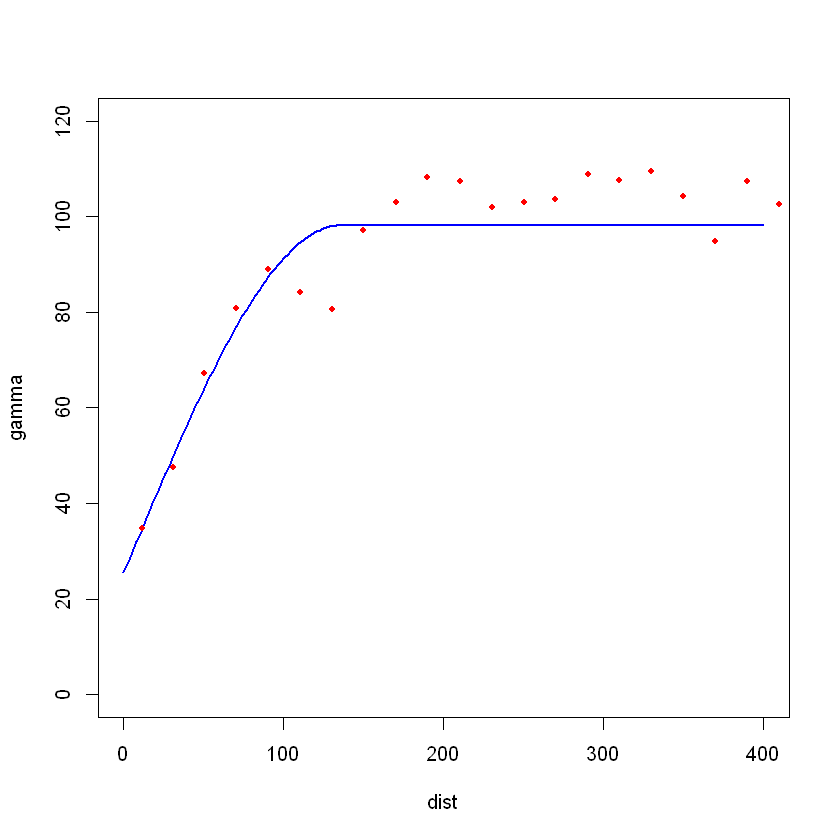

In [328]:
fvs <- fit.variogram(v, vgm(85, "Sph", 75, 20))
plot(variogramLine(fvs, 400), type='l', ylim=c(0,120) ,col='blue', lwd=2)
points(v[,2:3], pch=20, col='red')

<br>

### 일반 크리깅

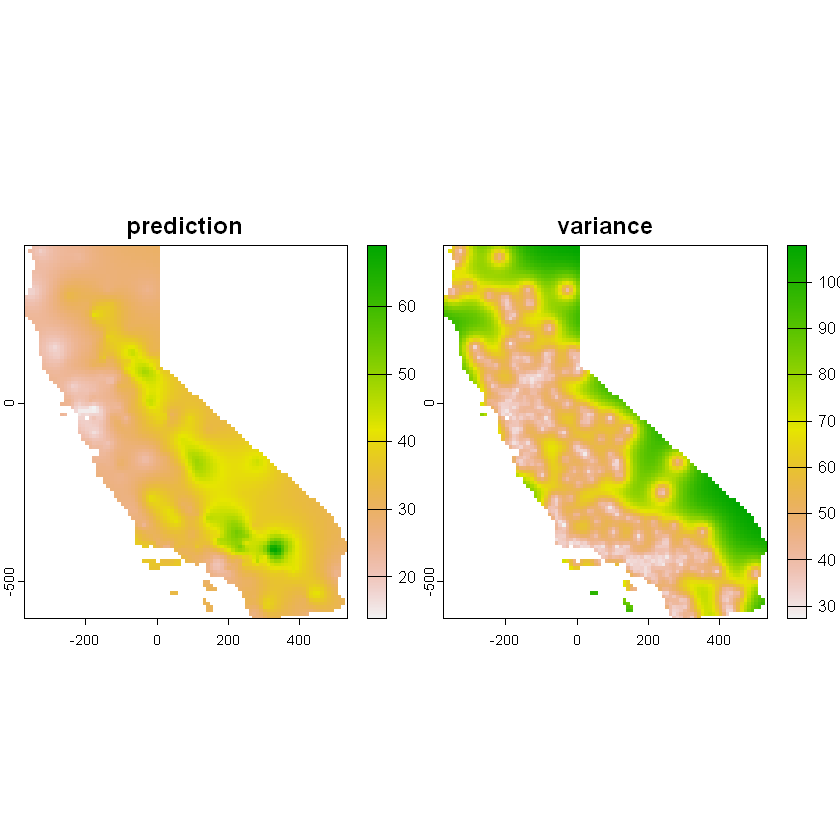

In [332]:
k <- gstat(formula=OZDLYAV~1, locations=~x+y, data=p, model=fve)
kp <- interpolate(r, k, debug.level=0)
ok <- mask(kp, ca)
names(ok) <- c('prediction', 'variance')
plot(ok)

<br>

#### IDW와의 비교
- `OZDLYAV`에 대한 보간

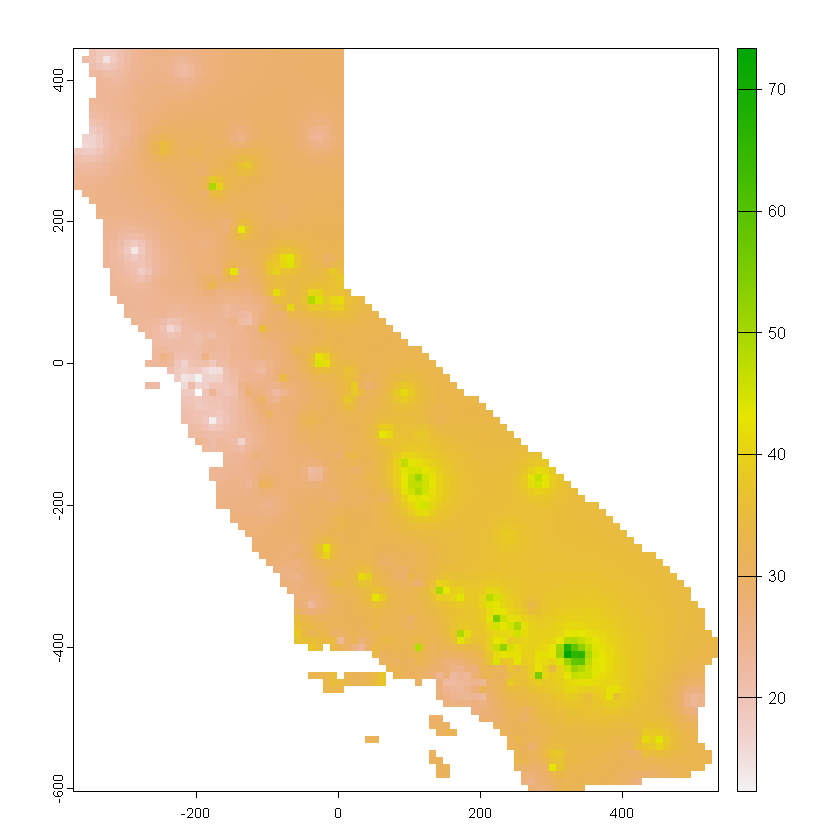

In [346]:
idm <- gstat(formula=OZDLYAV~1, locations=~x+y, data=p)
idp <- interpolate(r, idm, debug.level=0)
idp <- mask(idp, ca)
plot(idp, 1)

- 최적화

In [347]:
f1 <- function(x, test, train) {
  nmx <- x[1]
  idp <- x[2]
  if (nmx < 1) return(Inf)
  if (idp < .001) return(Inf)
  m <- gstat(formula=OZDLYAV~1, locations=~x+y, data=train, nmax=nmx, set=list(idp=idp))
  p <- predict(m, newdata=test, debug.level=0)$var1.pred
  RMSE(test$OZDLYAV, p)
}

In [348]:
set.seed(20150518)
i <- sample(nrow(aq), 0.2 * nrow(aq))
tst <- p[i,]
trn <- p[-i,]
opt <- optim(c(8, .5), f1, test=tst, train=trn)

- 최적의 IDW 모형

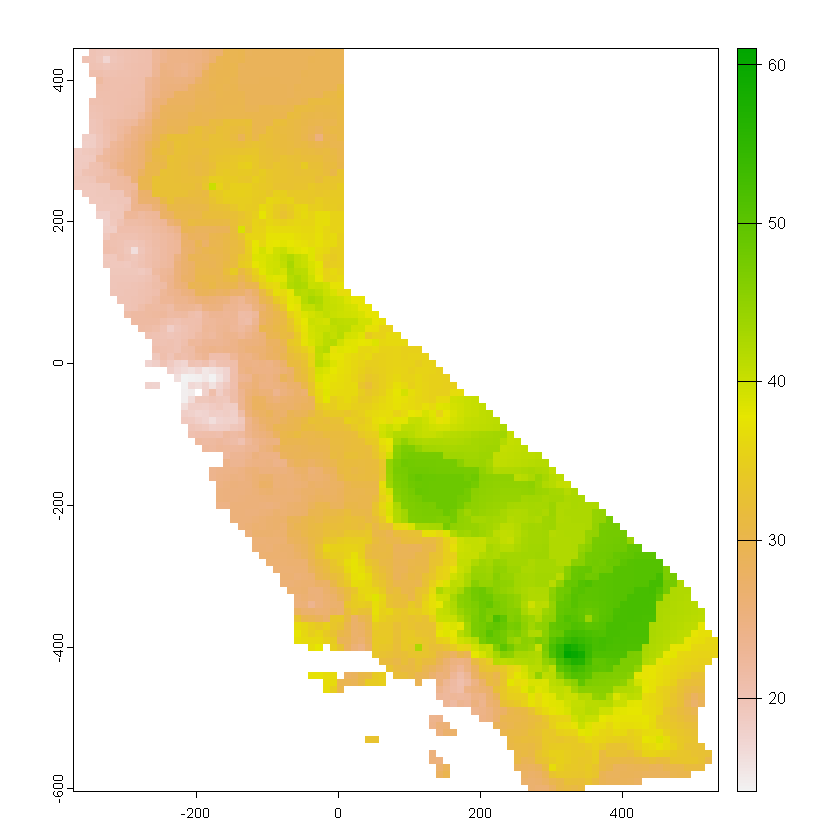

In [353]:
m <- gstat(formula=OZDLYAV~1, locations=~x+y, data=p, 
           nmax=opt$par[1], set=list(idp=opt$par[2]))
idw <- interpolate(r, m, debug.level=0)
idw <- mask(idw, ca)
plot(idw, 1)

#### IDW에 대한 스플라인 보간

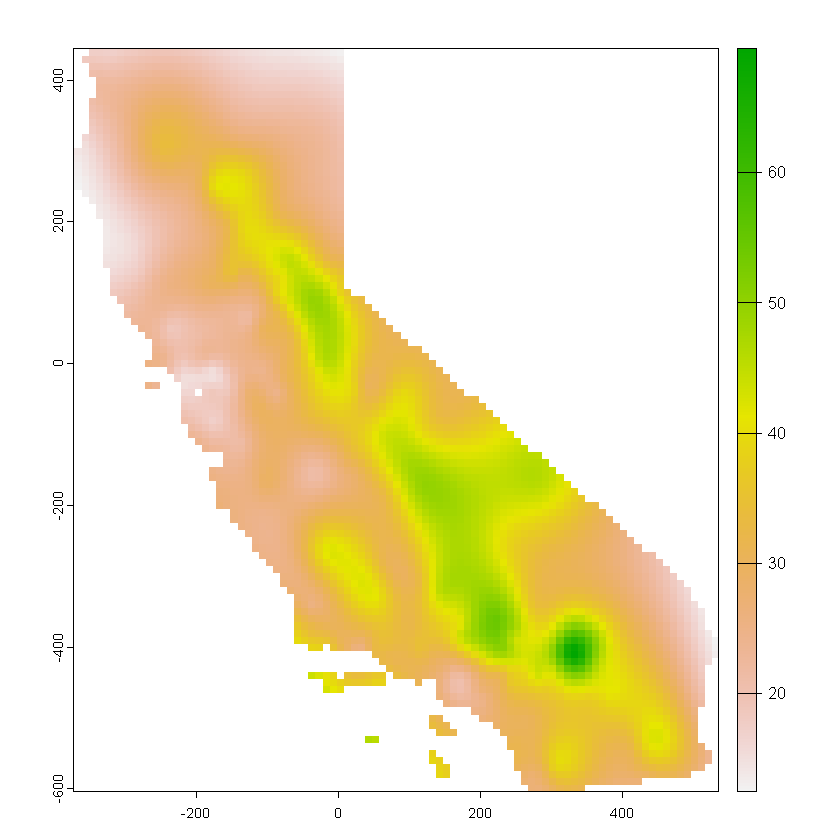

In [355]:
library(fields)
m <- fields::Tps(p[,c("x", "y")], p$OZDLYAV)
tps <- interpolate(r, m)
tps <- mask(tps, idw[[1]])
plot(tps)

<br>

#### 교차검증
- IDW, 크리깅, 스플라인 보간에 대한 교차검증 및 가중치 앙상블 모형 추가


In [359]:
k <- sample(5, nrow(p), replace=TRUE)
ensrmse <- tpsrmse <- krigrmse <- idwrmse <- rep(NA, 5)

for (i in 1:5) {
  test <- p[k!=i,]
  train <- p[k==i,]

  m <- gstat(formula=OZDLYAV~1, locations=~x+y, data=train, nmax=opt$par[1], set=list(idp=opt$par[2]))
  p1 <- predict(m, newdata=test, debug.level=0)$var1.pred
  idwrmse[i] <-  RMSE(test$OZDLYAV, p1)
    
  m <- gstat(formula=OZDLYAV~1, locations=~x+y, data=train, model=fve)
  p2 <- predict(m, newdata=test, debug.level=0)$var1.pred
  krigrmse[i] <-  RMSE(test$OZDLYAV, p2)
  m <- Tps(train[,c("x", "y")], train$OZDLYAV)
    
  p3 <- predict(m, test[,c("x", "y")])
  tpsrmse[i] <-  RMSE(test$OZDLYAV, p3)
    
  w <- c(idwrmse[i], krigrmse[i], tpsrmse[i])
  weights <- w / sum(w)
  ensemble <- p1 * weights[1] + p2 * weights[2] + p3 * weights[3]
  ensrmse[i] <-  RMSE(test$OZDLYAV, ensemble)
}

Grid searches over lambda (nugget and sill variances) with  minima at the endpoints: 
  (GCV) Generalized Cross-Validation 
   minimum at  right endpoint  lambda  =  1.582376e-07 (eff. df= 89.30001 )


- IDW 보간 RMSE / 크리깅 보간 RMSE / IDW 스플라인 보간 RMSE

In [362]:
rmi <- mean(idwrmse)
rmk <- mean(krigrmse)
rmt <- mean(tpsrmse)
rms <- c(rmi, rmt, rmk)
rms

[1] 8.011006 9.120307 7.736301

- 앙상블 RMSE

In [363]:
rme <- mean(ensrmse)
rme

[1] 7.936466

<br>

- **RMSE 값을 사용한 가중치 앙상블**
    - 모델의 RMSE와 영모형간의 정규화된 차이를 가중치로 사용

In [365]:
nullrmse <- RMSE(test$OZDLYAV, mean(test$OZDLYAV))
w <- nullrmse - rms
(weights <- ( w / sum(w) ))
sum(weights)

[1] 0.3830509 0.1848050 0.4321441

[1] 1

In [368]:
s <- c(idw[[1]], ok[[1]], tps)
ensemble <- sum(s * weights)

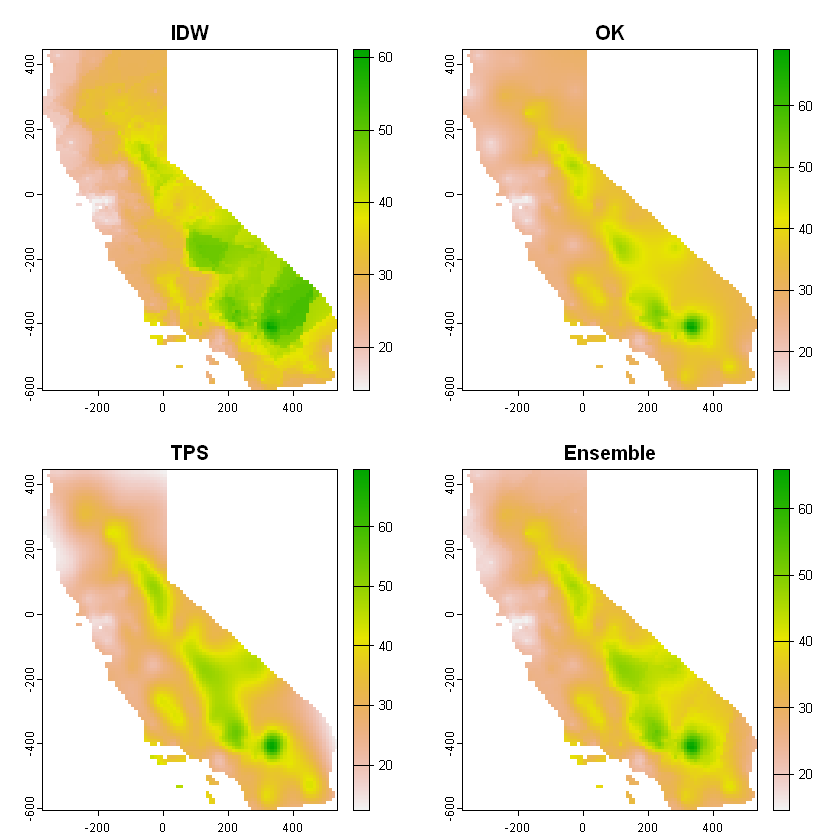

In [369]:
s <- c(idw[[1]], ok[[1]], tps, ensemble)
names(s) <- c("IDW", "OK", "TPS", "Ensemble")
plot(s)

<br>

## 02.04. 공간 분포 모델
- 이 접근 방식은 예를 들어 원격 감지 데이터를 다양한 클래스로 분류하는 데 널리 사용
    - **목표는 종의 관찰된 위치 집합을 기반으로 종의 전체 범위를 예측하는 것**
    - 예) Imaginus magnapedum ("빅풋"과 "사스콰치"라는 현지 이름으로도 알려져 있음)는 미국에서 발생한다고 믿어지고 있지만 과학자들이 발견하기가 너무 어려워서 트위터에 대한 많은 보도에도 불구하고 주류 언론에서는 그 존재 자체를 일반적으로 부인
    

<br>

### 데이터

In [376]:
library(terra)
library(rspat)
library(geodata)

In [377]:
bf <- spat_data('bigfoot')
dim(bf); head(bf)

[1] 3092    3

,lon,lat,Class
,<dbl>,<dbl>,<chr>
1,-142.9000,61.50000,A
2,-132.7982,55.18720,A
3,-132.8202,55.20350,A
4,-141.5667,62.93750,A
5,-149.7853,61.05950,A
6,-141.3165,62.77335,A


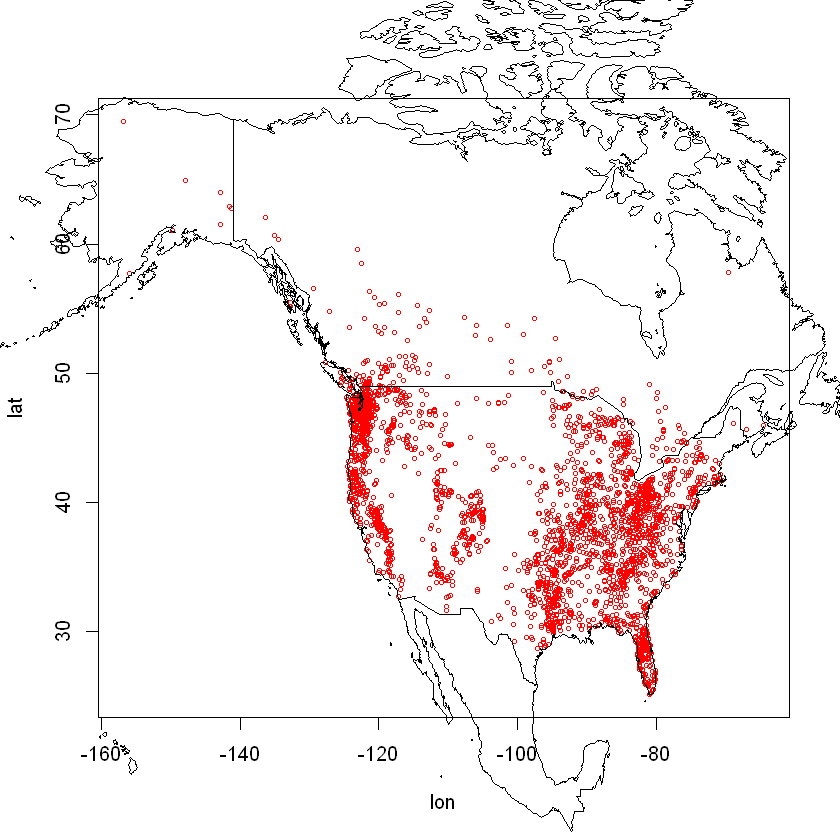

In [383]:
wrld <- geodata::world(path='.')
bnds <- wrld[wrld$NAME_0 %in% c("Canada", "Mexico", "United States"), ]
plot(select(bf, c("lon", "lat")), cex = 0.5, col = "red")
lines(bnds)

<br>

### 종 분포 모델링
#### 예측 변수
- 일반적으로 종 분포 모델에서는, 기후 데이터를 모델의 예측 변수로 사용

In [385]:
wc <- geodata::worldclim_global('bio', res = 10, '.')

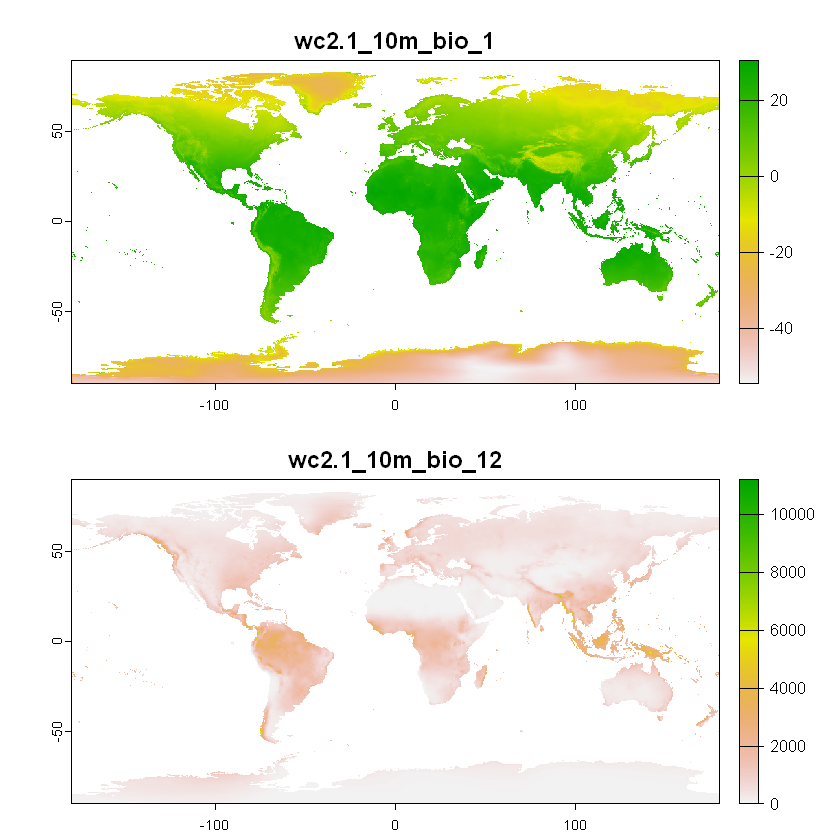

In [389]:
plot(wc[[c(1, 12)]], nr=2)

<br>

- 관측 위치에 대한 기후 데이터 추출
    - 종이 좋아하는 기후 조건에 대한 확인

In [399]:
bfc <- terra::extract(wc, bf[,1:2]) %>% select(-1)
dim(bfc); head(bfc, 3)

[1] 3092   19

,wc2.1_10m_bio_1,wc2.1_10m_bio_2,wc2.1_10m_bio_3,wc2.1_10m_bio_4,wc2.1_10m_bio_5,wc2.1_10m_bio_6,wc2.1_10m_bio_7,wc2.1_10m_bio_8,wc2.1_10m_bio_9,wc2.1_10m_bio_10,wc2.1_10m_bio_11,wc2.1_10m_bio_12,wc2.1_10m_bio_13,wc2.1_10m_bio_14,wc2.1_10m_bio_15,wc2.1_10m_bio_16,wc2.1_10m_bio_17,wc2.1_10m_bio_18,wc2.1_10m_bio_19
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,-1.832979,12.504708,28.95899,1152.4308,20.34075,-22.840000,43.18075,5.327750,-0.6887083,11.80792,-16.038542,991,120,42,31.32536,337,157,288,216
2,6.360650,5.865935,32.27475,462.5731,16.65505,-1.519947,18.17500,3.964495,10.4428196,12.28183,1.467686,3079,448,141,35.27518,1127,468,630,873
3,6.360650,5.865935,32.27475,462.5731,16.65505,-1.519947,18.17500,3.964495,10.4428196,12.28183,1.467686,3079,448,141,35.27518,1127,468,630,873


<br>

- 빅풋이 관찰된 장소의 기온과 강수량에 대한 산점도

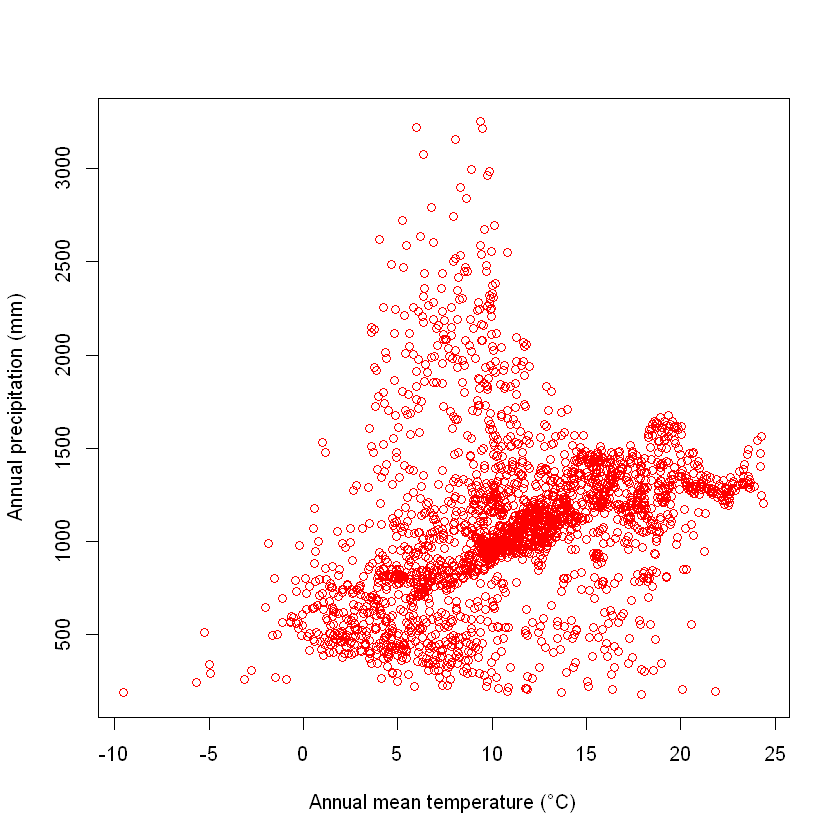

In [400]:
plot(bfc[ ,"wc2.1_10m_bio_1"], bfc[, "wc2.1_10m_bio_12"], col="red",
        xlab="Annual mean temperature (°C)", ylab="Annual precipitation (mm)")

<br>

### 배경 데이터
- 일반적으로 무언가가 관찰된 위치의 예측 변수 값과, 관찰되지 않은 위치의 예측 변수 값을 비교하는 모델을 구축하지만,

    현재 빅풋의 유무를 판단하는 체계적인 조사 데이터는 없음
    
    $\rightarrow$ **존재 대 부재가 아니라 존재 대 "배경"을 모델링**
    
    <br>
    
    - "배경"은 무작위(또는 최대 엔트로피) 기대치이며, 종이 예측 변수(또는 모델에는 없지만 예측 변수와 상관 관계가 있는 다른 변수)에 대한 선호도가 없는 경우 얻을 수 있는 것
    - 아주 먼 곳(열대 아프리카나 남극 대륙)에서 부재 데이터를 취하는 것은 별 의미가 없으며, 일반적으로 이러한 정보는 현재 존재 데이터가 있는 전체 연구 영역에서 가져옴

<br>

####  먼저 모든 관측점의 범위를 정의

In [401]:
ext_bf <- ext(vect(bf[, 1:2])) + 1
ext_bf

SpatExtent : -157.75, -63.4627, 24.141, 70.5 (xmin, xmax, ymin, ymax)

#### 정의된 범위에서 5000개의 랜덤 표본 추출

In [405]:
set.seed(0)
window(wc) <- ext_bf

bg <- spatSample(wc, 5000, "random", na.rm=TRUE, xy=TRUE)
head(bg)

,x,y,wc2.1_10m_bio_1,wc2.1_10m_bio_2,wc2.1_10m_bio_3,wc2.1_10m_bio_4,wc2.1_10m_bio_5,wc2.1_10m_bio_6,wc2.1_10m_bio_7,wc2.1_10m_bio_8,⋯,wc2.1_10m_bio_10,wc2.1_10m_bio_11,wc2.1_10m_bio_12,wc2.1_10m_bio_13,wc2.1_10m_bio_14,wc2.1_10m_bio_15,wc2.1_10m_bio_16,wc2.1_10m_bio_17,wc2.1_10m_bio_18,wc2.1_10m_bio_19
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,-99.2500,66.75000,-13.2934895,7.870646,14.96619,1638.6833,15.42850,-37.16100,52.58950,6.484917,⋯,7.518209,-31.76942,171,33,4,70.29919,90,13,78,13
2,-106.0833,42.08333,5.6722708,14.530958,36.82943,894.3715,27.86600,-11.58875,39.45475,9.226916,⋯,17.168291,-4.83975,288,42,13,38.78144,112,41,90,41
3,-111.9167,46.58333,6.7605939,14.135854,35.23372,927.7927,28.14375,-11.97650,40.12025,15.638333,⋯,18.186209,-4.92175,293,48,9,53.40759,129,35,115,35
4,-106.9167,54.75000,0.4086979,11.528605,24.43290,1290.1088,22.55225,-24.63250,47.18475,15.417084,⋯,15.417084,-16.31392,471,86,16,58.32499,220,53,220,56
5,-118.2500,67.08333,-9.1363859,8.185354,16.34505,1567.0846,17.46575,-32.61275,50.07850,8.609292,⋯,10.573625,-27.49783,223,43,7,61.21693,108,27,93,29
6,-111.2500,38.91667,8.4194584,15.997125,38.84047,904.0610,30.49050,-10.69625,41.18675,19.076958,⋯,19.812834,-2.50475,228,28,11,32.40370,83,40,72,44


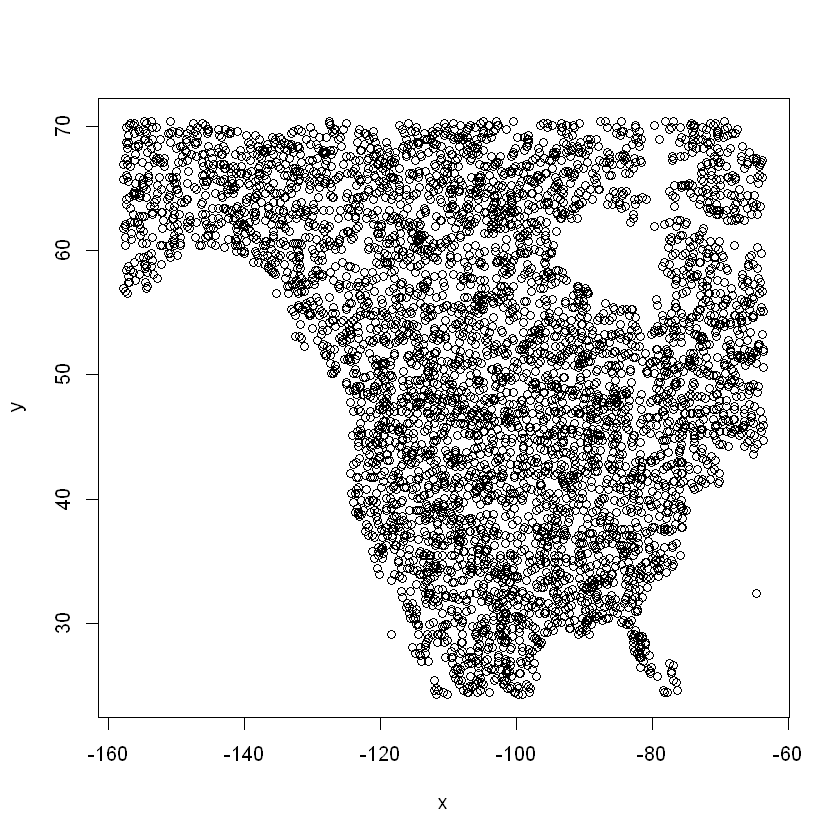

In [409]:
plot(bg[, c("x", "y")])

In [410]:
bg <- bg[, -c(1:2)]

<br>

- 배경 데이터와, 빅풋이 관찰된 곳의 기후를 비교
    - 빅풋이 널리 퍼져 있지만 추운 지역이나 덥고 건조한 지역에서는 흔하지 않다는 것을 알 수 있음

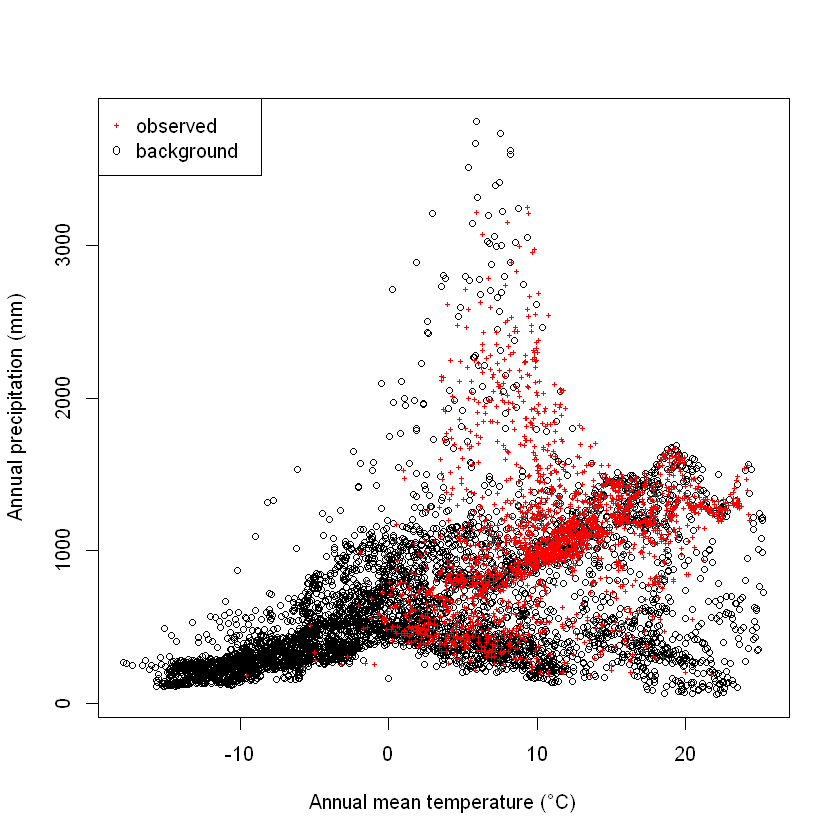

In [411]:
plot(bg[,1], bg[,12], xlab="Annual mean temperature (°C)",
          ylab="Annual precipitation (mm)", cex=.8)
points(bfc[,1], bfc[,12], col="red", cex=.6, pch="+")
legend("topleft", c("observed", "background"), col=c("red", "black"), pch=c("+", "o"), pt.cex=c(.6, .8))

<br>

### 서쪽 지역 관측값의 학습

In [412]:
bfe <- bfc[bf[, 1] > -102, ] # 동부지역
bfw <- bfc[bf[, 1] <= -102, ] # 서부지역

- `pa` : 관측여부 (이진반응변수)

In [414]:
dw <- rbind(cbind(pa=1, bfw), cbind(pa=0, bg))
de <- rbind(cbind(pa=1, bfe), cbind(pa=0, bg))
dw <- data.frame(dw)
de <- data.frame(na.omit(de))

<br>

#### 모형 적합 (랜덤포레스트)
- **관측 여부에 대한 이진 범주형 예측 모델**

In [432]:
library(randomForest)

In [433]:
set.seed(123)
i <- sample(nrow(dw), 0.2 * nrow(dw))
test <- dw[i,]
train <- dw[-i,]

In [434]:
fpa <- as.factor(train[, 'pa'])

In [435]:
crf <- randomForest(train[, 2:ncol(train)], fpa)
crf


Call:
 randomForest(x = train[, 2:ncol(train)], y = fpa) 
               Type of random forest: classification
                     Number of trees: 500
No. of variables tried at each split: 4

        OOB estimate of  error rate: 7.19%
Confusion matrix:
     0   1 class.error
0 3832 165  0.04128096
1  193 790  0.19633774

- 변수 중요도 : 각 변수를 하나씩 무작위로 추출한 다음, 모델 예측의 감소를 평가하여 계산

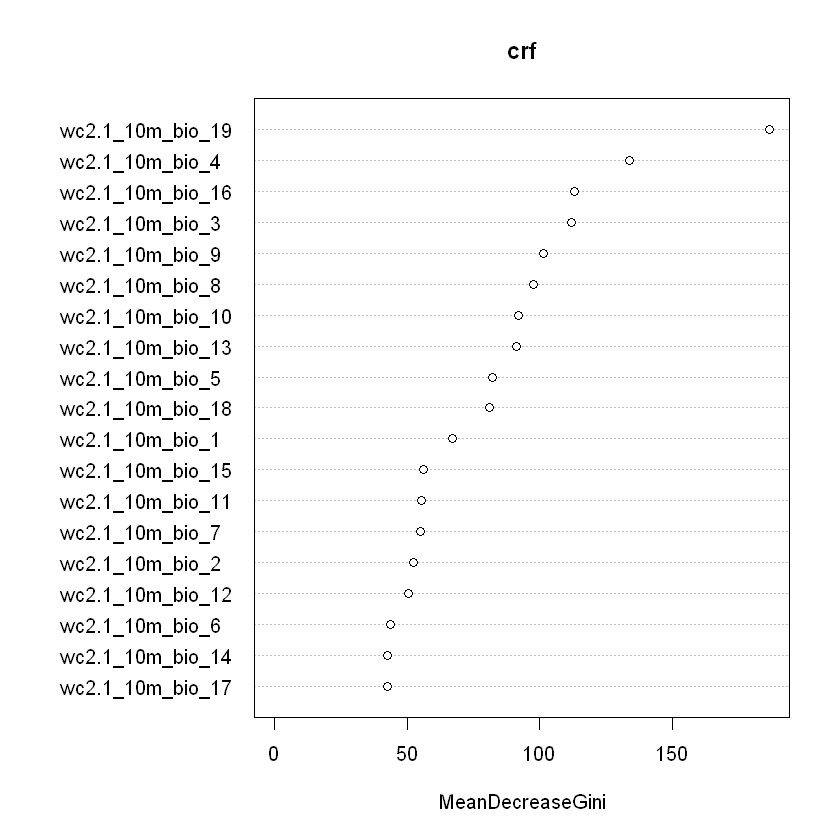

In [436]:
varImpPlot(crf)

<br>

- 매개변수 조정 (mtry : 각각의 트리마다 랜덤으로 선택되는 설명변수의 수)

Warning message in randomForest.default(x, y, mtry = mtryStart, ntree = ntreeTry, :
"The response has five or fewer unique values.  Are you sure you want to do regression?"


mtry = 6  OOB error = 0.05594974 
Searching left ...


Warning message in randomForest.default(x, y, mtry = mtryCur, ntree = ntreeTry, :
"The response has five or fewer unique values.  Are you sure you want to do regression?"


mtry = 3 	OOB error = 0.05612125 
-0.003065481 0.05 
Searching right ...


Warning message in randomForest.default(x, y, mtry = mtryCur, ntree = ntreeTry, :
"The response has five or fewer unique values.  Are you sure you want to do regression?"


mtry = 12 	OOB error = 0.05485775 
0.01951734 0.05 


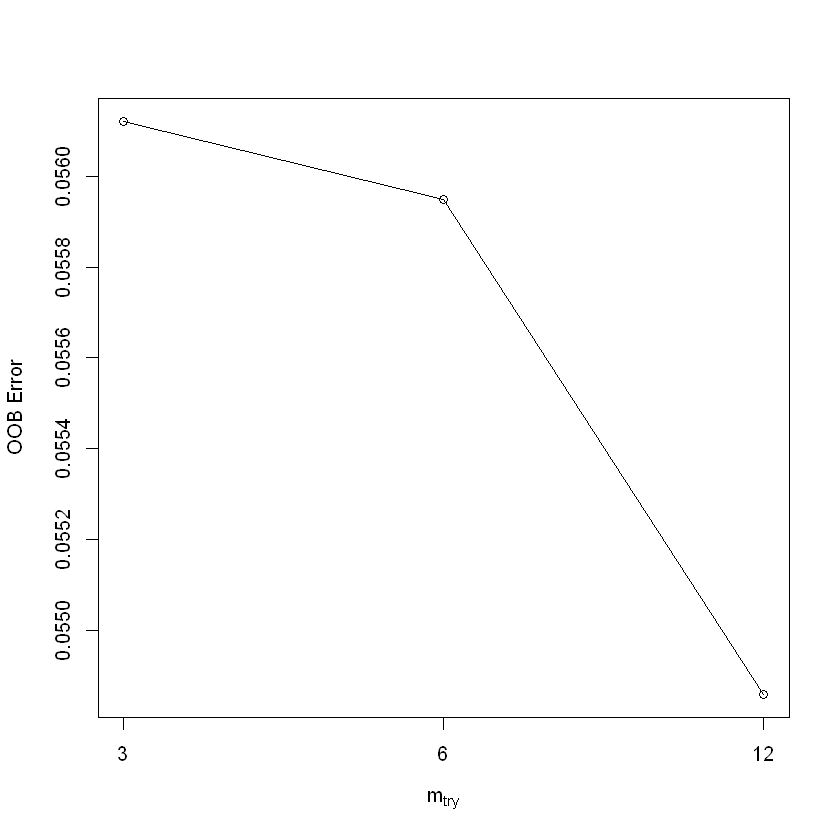

In [437]:
trf <- tuneRF(train[, 2:ncol(train)], train[, "pa"])

In [439]:
trf
(mt <- trf[which.min(trf[,2]), 1])

,mtry,OOBError
3,3,0.05612125
6,6,0.05594974
12,12,0.05485775


[1] 12

<br>

- **관측 확률에 대한 연속형 예측 모델**

In [440]:
rrf <- randomForest(train[, 2:ncol(train)], train[, "pa"], mtry=mt, ntree=250)
rrf

Warning message in randomForest.default(train[, 2:ncol(train)], train[, "pa"], mtry = mt, :
"The response has five or fewer unique values.  Are you sure you want to do regression?"



Call:
 randomForest(x = train[, 2:ncol(train)], y = train[, "pa"], ntree = 250,      mtry = mt) 
               Type of random forest: regression
                     Number of trees: 250
No. of variables tried at each split: 12

          Mean of squared residuals: 0.05421534
                    % Var explained: 65.78

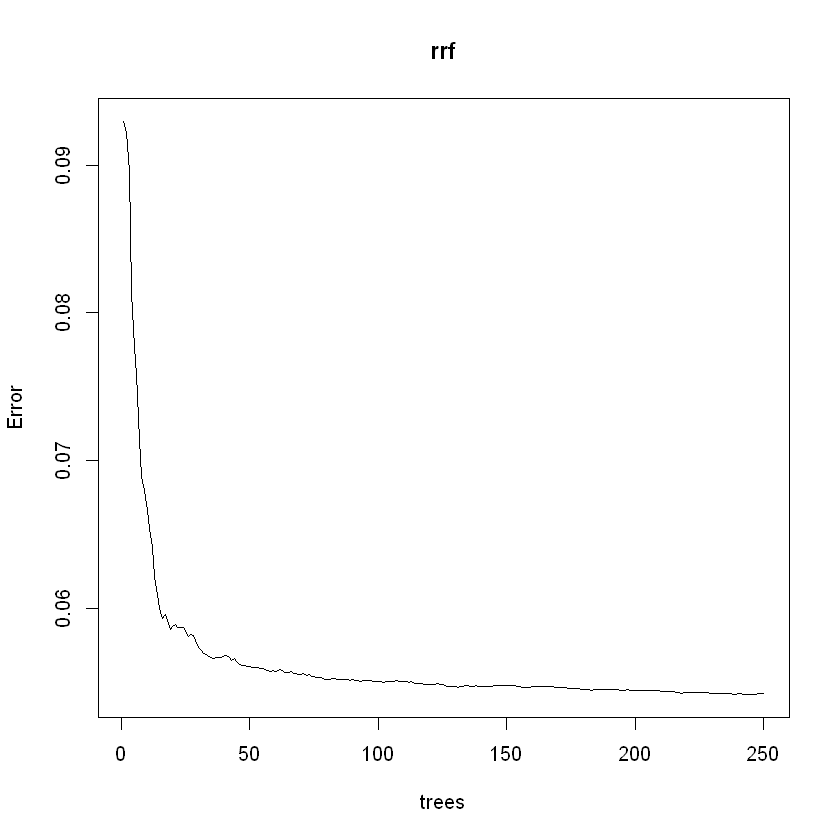

In [441]:
plot(rrf)

<br>

### 관측 확률 예측

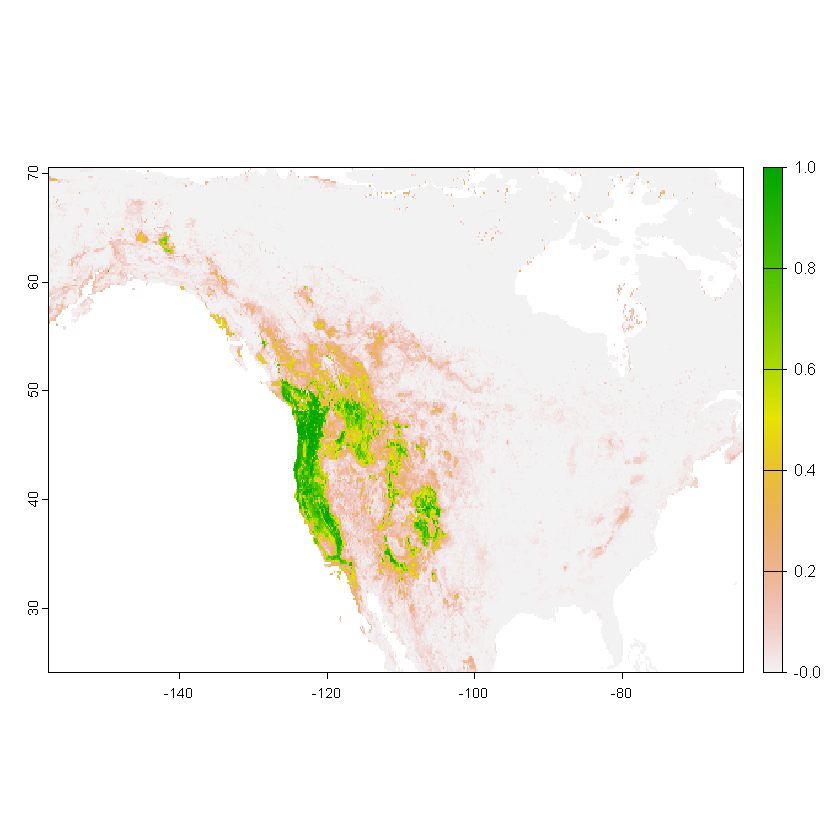

In [443]:
rp <- predict(wc, rrf, na.rm=TRUE)
plot(rp)

In [445]:
library(predicts)

In [447]:
eva <- pa_evaluate(predict(rrf, test[test$pa==1, ]), predict(rrf, test[test$pa==0, ]))
eva

@stats
   np   na prevalence   auc cor pcor   ODP
1 241 1003      0.194 0.965 0.8    0 0.806

@thresholds
  max_kappa max_spec_sens no_omission equal_prevalence equal_sens_spec
1     0.447         0.322       0.004            0.195           0.217

@tr_stats
    treshold kappa  CCR  TPR  TNR  FPR  FNR  PPP  NPP  MCR  OR
1          0     0 0.19    1    0    1    0 0.19  NaN 0.81 NaN
2          0  0.25 0.56    1 0.46 0.54    0 0.31    1 0.44 Inf
3          0  0.25 0.56    1 0.46 0.54    0 0.31    1 0.44 Inf
4        ...   ...  ...  ...  ...  ...  ...  ...  ...  ... ...
594        1  0.05 0.81 0.03    1    0 0.97    1 0.81 0.19 Inf
595        1  0.05 0.81 0.03    1    0 0.97    1 0.81 0.19 Inf
596        1     0 0.81    0    1    0    1  NaN 0.81 0.19 NaN

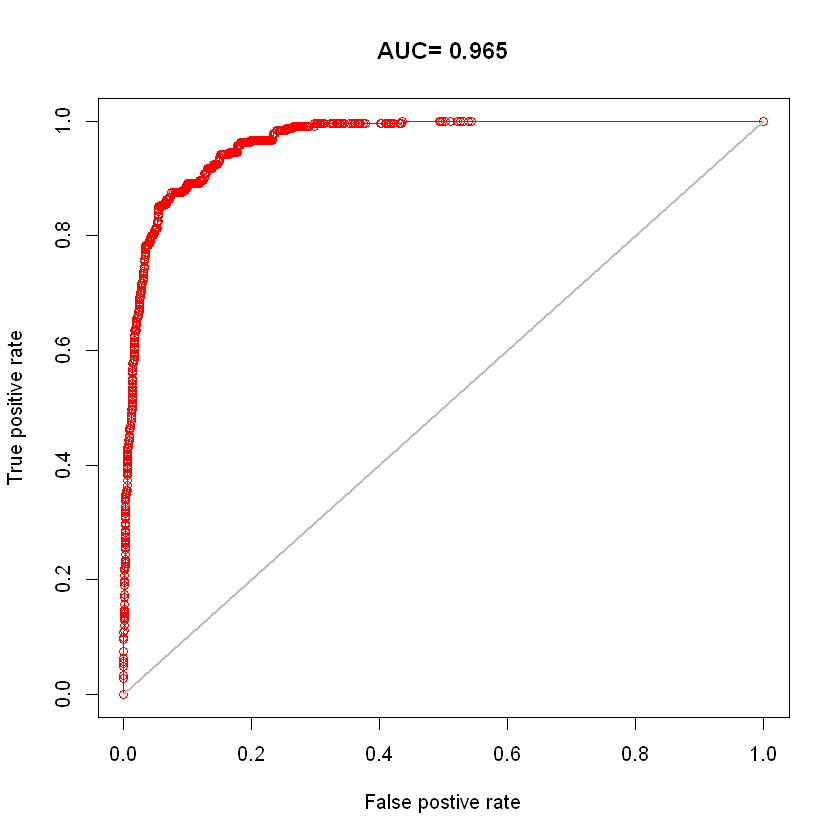

In [448]:
plot(eva, "ROC")

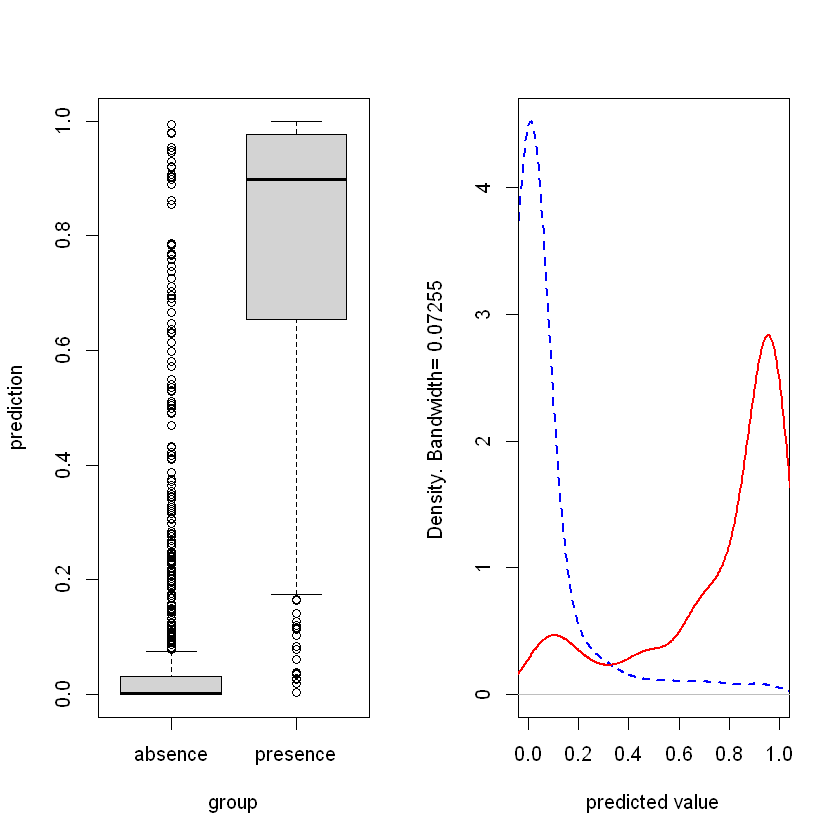

In [449]:
par(mfrow=c(1,2))
plot(eva, "boxplot")
plot(eva, "density")

<br>

- **적절한 임곗값을 얻으려면, '최대 특이성 + 민감도' 임곗값을 사용**

In [453]:
tr <- eva@thresholds
tr

max_kappa,max_spec_sens,no_omission,equal_prevalence,equal_sens_spec
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0.4469667,0.3219856,0.00425973,0.1952333,0.2167239


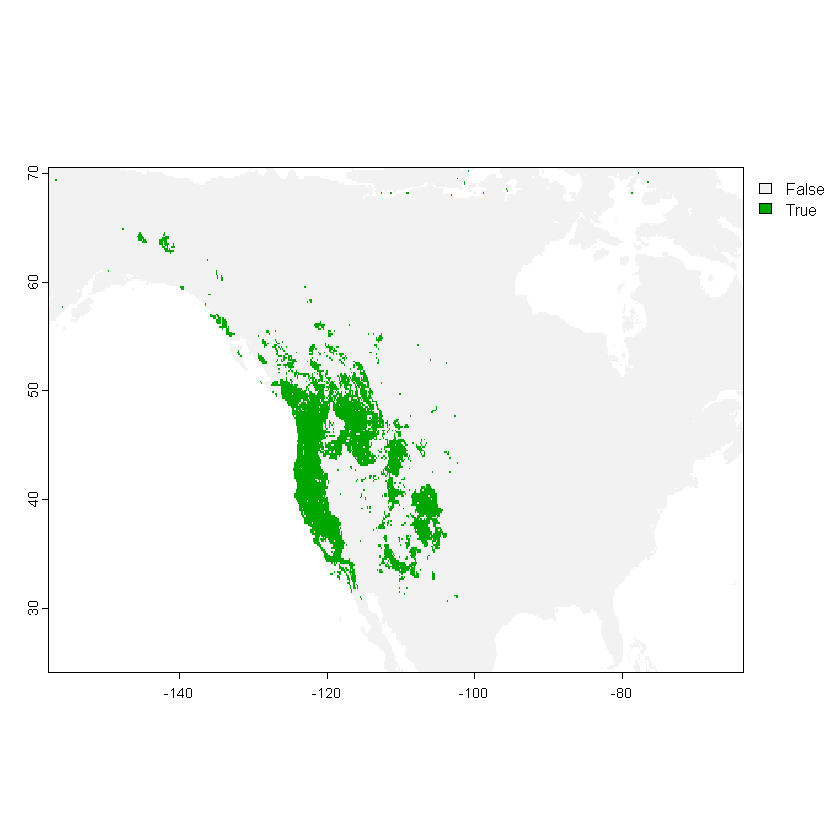

In [455]:
plot(rp > tr$max_spec_sens)

<br>

### 분류 예측

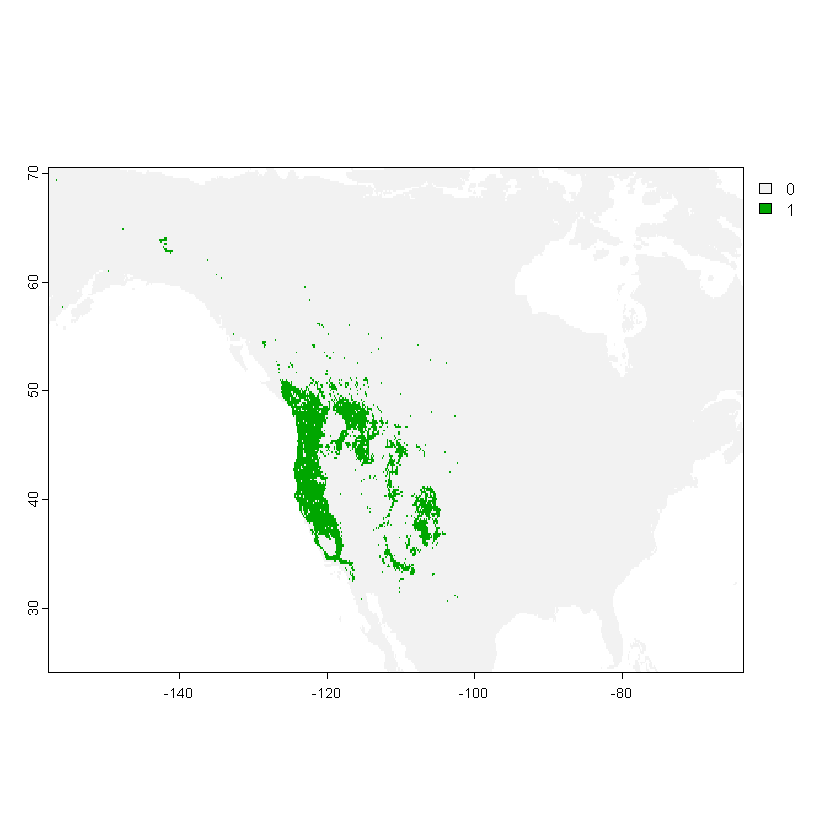

In [456]:
rc <- predict(wc, crf, na.rm=TRUE)
plot(rc)

<br>

- 분류 클래스별 확률

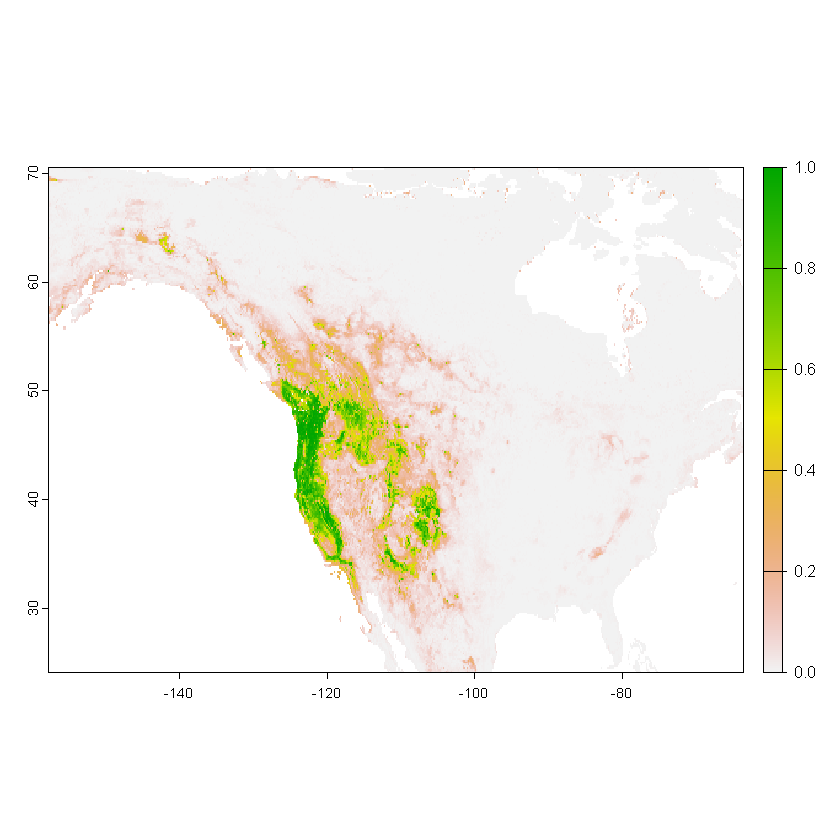

In [457]:
rc2 <- predict(wc, crf, type="prob", na.rm=TRUE)
plot(rc2, 2)

<br>

### 외삽법 (서쪽 지역 관측값의 학습을 통한 동쪽 지역 예측)

In [458]:
eva2 <- pa_evaluate(predict(rrf, de[de$pa==1, ]), predict(rrf, de[de$pa==0, ]))
eva2

@stats
    np   na prevalence   auc    cor pcor   ODP
1 1866 5000      0.272 0.561 -0.137    0 0.728

@thresholds
  max_kappa max_spec_sens no_omission equal_prevalence equal_sens_spec
1     0.001         0.001           0            0.271           0.001

@tr_stats
    treshold kappa  CCR  TPR TNR FPR  FNR  PPP  NPP  MCR   OR
1          0     0 0.27    1   0   1    0 0.27  NaN 0.73  NaN
2          0  0.02 0.51 0.53 0.5 0.5 0.47 0.28 0.74 0.49 1.12
3          0  0.02 0.51 0.53 0.5 0.5 0.47 0.28 0.74 0.49 1.12
4        ...   ...  ...  ... ... ...  ...  ...  ...  ...  ...
522     0.99     0 0.73    0   1   0    1    0 0.73 0.27    0
523     0.99     0 0.73    0   1   0    1  NaN 0.73 0.27  NaN
524     0.99     0 0.73    0   1   0    1  NaN 0.73 0.27  NaN

<br>

- **서쪽지역의 관측값을 기준으로, 동쪽 지역에 대한 예측은 부적합**
    - 생물종이 다른 지역에서도 생존 가능한지에 대한 여부를 고려하지 않음

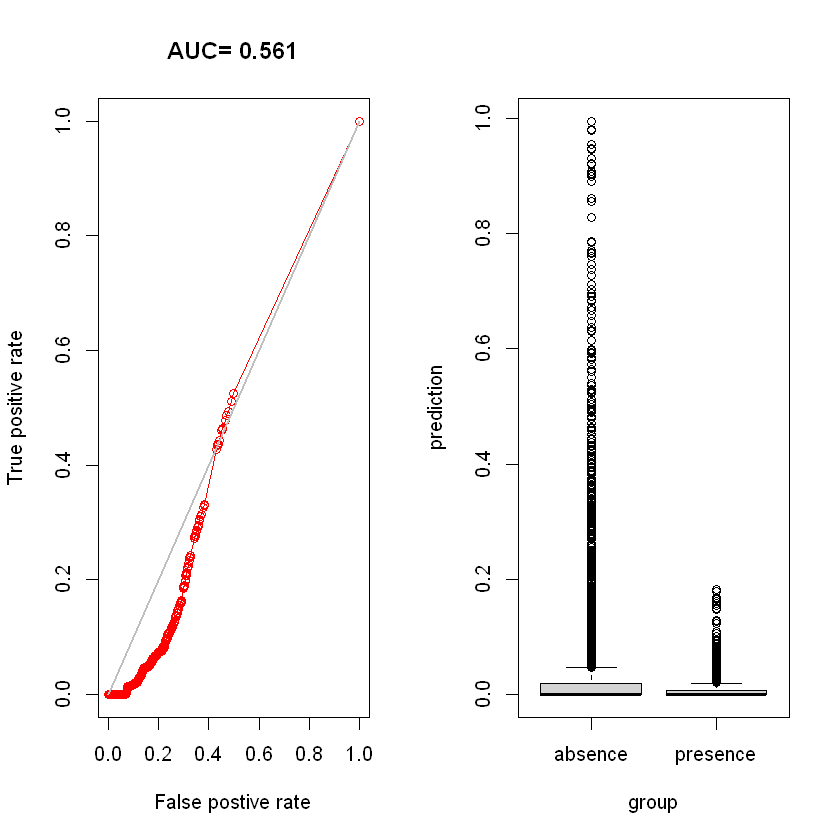

In [459]:
par(mfrow=c(1,2))
plot(eva2, "ROC")
plot(eva2, "boxplot")

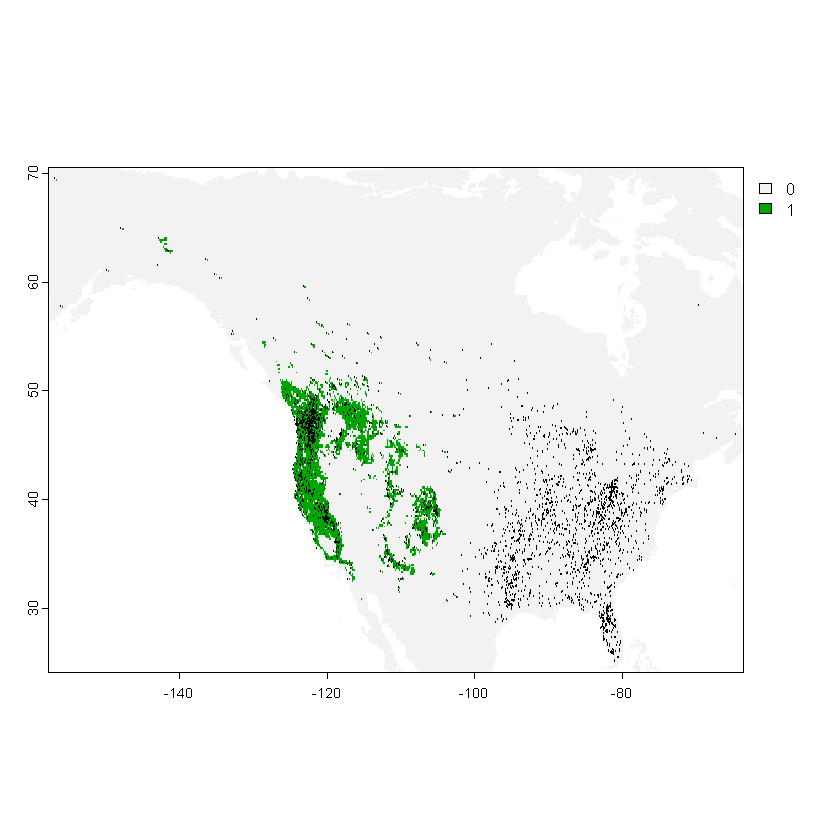

In [460]:
plot(rc)
points(bf[,1:2], cex=.25)

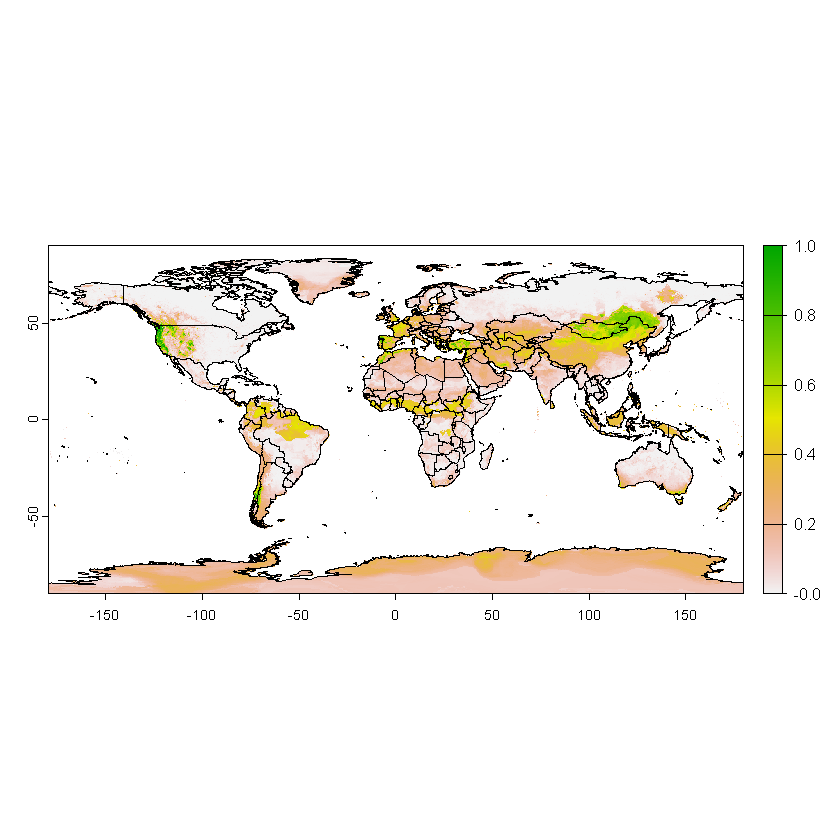

In [461]:
window(wc) <- NULL
pm <- predict(wc, rrf, na.rm=TRUE)
plot(pm)
lines(wrld)

<br>

### 관찰 범위 이동 추정
- 시간과 공간정보를 동시에 사용
    - 모델을 다른 시점 (미래/과거)의 기후 데이터에 대해 예측하여, 현재 데이터에 대한 예측값과 비교

In [462]:
fut <- cmip6_world("CNRM-CM6-1", "585", "2061-2080", var="bio", res=10, path=".")
names(fut)

[1] "bio01" "bio02" "bio03" "bio04" "bio05" "bio06" "bio07" "bio08" "bio09"
[10] "bio10" "bio11" "bio12" "bio13" "bio14" "bio15" "bio16" "bio17" "bio18"
[19] "bio19"

- 미래 시점에 대한 예측

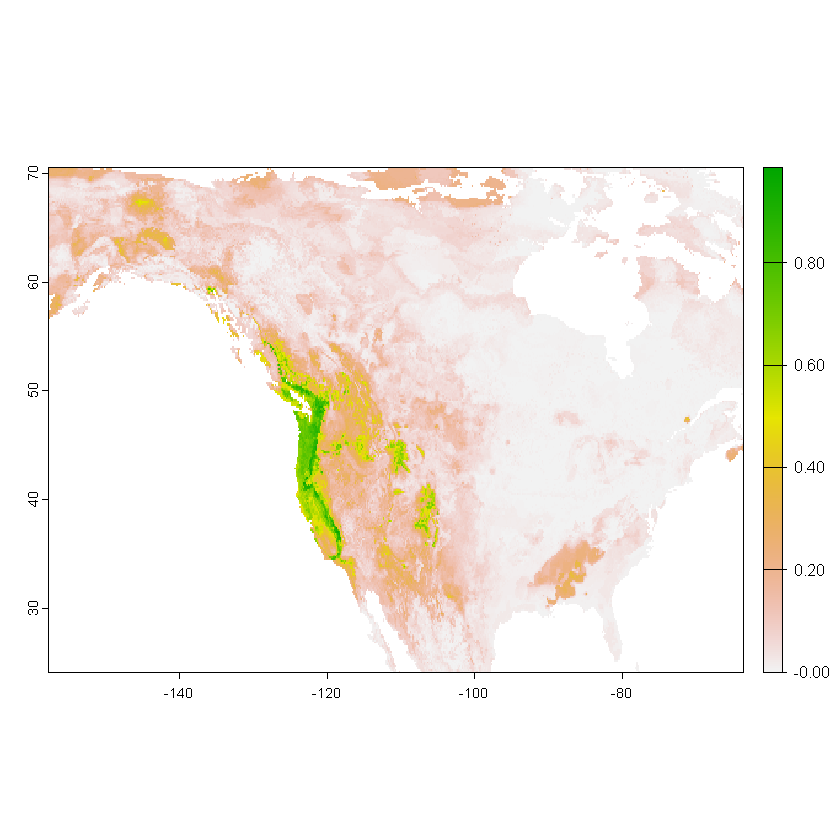

In [465]:
names(fut) <- names(wc)
window(fut) <- ext_bf
pfut <- predict(fut, rrf, na.rm=TRUE)
plot(pfut)

- 현재 시점에 대한 예측

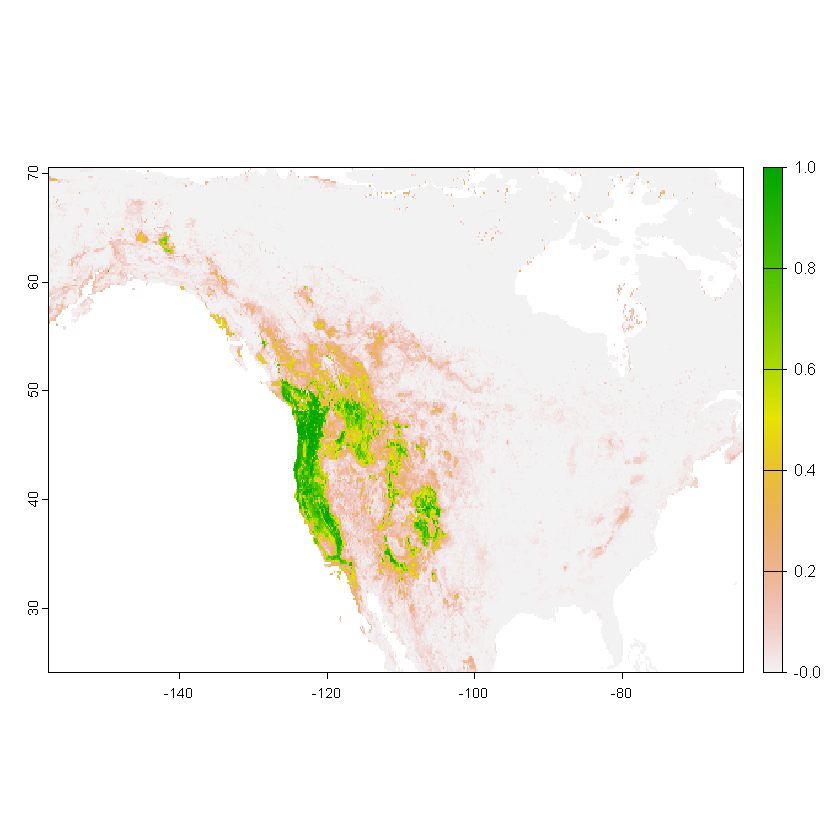

In [467]:
set.seed(0)
window(wc) <- ext_bf
rp <- predict(wc, rrf, na.rm=TRUE)
plot(rp)